# Problem Statement 

When the lending club company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

#### The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

### Data Description

##### Loan_Amount: Amount requested by applicant
##### Funded Amount: The total amount commited to that loan at that point of time
##### Term: Loan duration term in months
##### int_rate : Interest Rate on the loan
##### installment : The monthly payment owed by the borrower if the loan originates.
##### grade: Lending club assigned grade
##### sub_grade: Lending club assigned sub-grade (within grade)
##### emp_title: The job title supplied by the Borrower when applying for the loan.*
##### emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
##### home_ownership: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
##### annual_inc: The self-reported annual income provided by the borrower during registration.
##### verification_status: Indicates if income was verified by Lending club, not verified, or if the income source was verified
##### issue_d: The month which the loan was funded
##### loan_status: Current status of the loan. It can be fully paid or charged off or current 
##### purpose: A category provided by the borrower for the loan request. 
##### title: The loan title provided by the borrower
##### addr_state: The state provided by the borrower in the loan application
##### dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
##### mths_since_last_delinq: The number of months since the borrower's last delinquency
##### mths_since_last_record: The number of months since the last public record.
##### revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
##### collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections
##### chargeoff_within_12_mths: Number of charge-offs within 12 months
##### pub_rec_bankruptcies: Number of public record bankruptcies
##### tax_liens: Number of tax liens
##### recoveries: post charge off gross recovery


## Tips to read this notebook:
    
   -  All analysis will be marked as **Driving factors**/**Observation**/**Trend**
          Driving factor - Features that lead to more probability of charged off
          Observation- Fact observed from the data
          Trend - How a feature is correlated to other/ Influence of one feature to another 
          
   - The notebook is divided into following steps:
       1.  Importing libraries
       2.  Data Reading
       3.  Data Cleaning
           - visualizing null values before data cleaning
           - removing columss with all null values
           - removing columns with all same values
           - removing columns with null values > 60%
           - removing columns with distinct values
           - removing columns with customer behaviour
           - Analyzing remaining null values and replacing with mode/mean/median depending upon the scenario
           - Visualizing null values after data cleaning
       4.  Data Types Analysis and Conversion
       5.  Data Formatting and transformation
       6.  Treat Outliers, Analyze skewness, kurtosis
       7.  Data Summary 
       8.  Data Integrity Checks
       9.  Univariate Analaysis and creating transformed Columns for analysis
       10. Bivariate Analysis
       11. Multivariate analysis
       

## Step 1 -  Importing libraries

In [1]:
#Load the libraries
import pandas as pd #To work with dataset
import numpy as np 
import seaborn as sns #Graph library that use matplot in background
import matplotlib as mpl #graph library
import math #for math calculations
import matplotlib.pyplot as plt

import plotly
#plotly for graphs
import plotly.graph_objs as go
import plotly.offline as py 
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go

init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS


## Step 2-  Data reading

In [2]:
#reading the dataset into pandas dataframe
loandata=pd.read_csv("loan.csv",  low_memory=False)
loandata.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [3]:
print(loandata.shape)

(39717, 111)


In [4]:
print("There are a total of", loandata.shape[0] ,"rows and ",loandata.shape[1]," coloumns")

There are a total of 39717 rows and  111  coloumns


## Step 3- Data Cleaning

### Visualizing null values before data cleaning

<AxesSubplot:>

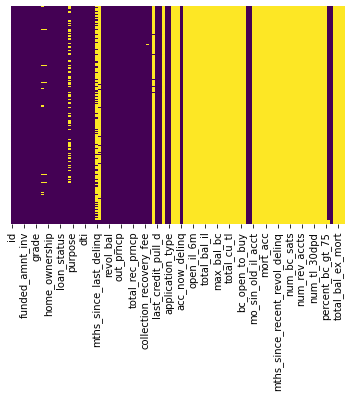

In [5]:
sns.heatmap(loandata.isnull(),yticklabels=False,cbar=False, cmap="viridis")

###  Remove columns with all null values

In [6]:
#check how many columns with null records
nullcount=loandata.isna().sum()

Columns with all null values are not useful for our analysis
Count of columns with all null values as 54
Remaining columns after first drop : columnslisttoconsider, count is 57

In [7]:

columnslistwithallnull =[]
columnslisttoconsider= []
for index, value in nullcount.items():
    if value==len(loandata):
       columnslistwithallnull.append(index) 
    else:
       columnslisttoconsider.append(index)
print("Columns to drop as they have all null values:", len(columnslistwithallnull))
#print(" Dropped columns in this step", columnslistwithallnull)
print("Remaining columns", len(columnslisttoconsider)) 

Columns to drop as they have all null values: 54
Remaining columns 57


###   Remove columns with same value across the dataset, these columns will not be useful to analysis


In [8]:

newcolstoconsider=[]
samevaluecols=[]
for i in columnslisttoconsider:
    if len(loandata[i].value_counts())==1:
       samevaluecols.append(i) 
    else:
       newcolstoconsider.append(i)
print("Columns to drop as they have all same values:", len(samevaluecols)) 
#print(" Dropped columns in this step", samevaluecols)
print("Remaining columns", len(newcolstoconsider)) 


Columns to drop as they have all same values: 9
Remaining columns 48


Get all columns to drop as new variable colstodrop (54+9)

In [9]:
colstodrop=columnslistwithallnull+samevaluecols
len(colstodrop)

63

###  Drop columns and create a new dataframe


In [10]:
loandata=loandata.drop(axis=1,  columns=colstodrop)

###  Remove columns where there are all distinct values, this is not useful for our analysis

In [11]:
alldistinctvalues=[]
for index,value in loandata.nunique().items():
    if value == len(loandata):
        alldistinctvalues.append(index)
print(alldistinctvalues)
loandata=loandata.drop(axis=1,  columns=alldistinctvalues)
# Clearly, these columns can also be remmoved as they wont add value in the analysis

['id', 'member_id', 'url']


### Check shape of new dataset after dropping columns

In [12]:
print(loandata.shape)
print("There are a total of", loandata.shape[0] ,"rows and ",loandata.shape[1]," coloumns")

(39717, 45)
There are a total of 39717 rows and  45  coloumns


###  Drop columns with most null values
#### Criteria is if null values is greater than 60% 

In [13]:
mostnullvalues=[]
for index,value in loandata.isna().sum().items():
    if value > len(loandata)*0.6:
        mostnullvalues.append(index)
print(mostnullvalues)

loandata=loandata.drop(axis=1,  columns=mostnullvalues)

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


In [14]:
print(loandata.shape)
print("There are a total of", loandata.shape[0] ,"rows and ",loandata.shape[1]," coloumns")

(39717, 42)
There are a total of 39717 rows and  42  coloumns


####  Drop customer behaviour variables, After studying the data dictionary, further dropping columns customer behaviour variables

In [15]:
# Open
colstodropfurther=["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loandata=loandata.drop(axis=1,  columns=colstodropfurther)

###  Based On data understanding, removing desc, zip_code as it will not be useful for our analysis

In [16]:
loandata=loandata.drop(axis=1,  columns=["desc","zip_code"])

### list of columns

In [17]:
print(loandata.shape)
print("There are a total of", loandata.shape[0] ,"rows and ",loandata.shape[1]," coloumns")

(39717, 22)
There are a total of 39717 rows and  22  coloumns


###  Analyzing null values in remaining columns and treating them if required

In [18]:
total_missing = loandata.isnull().sum().sort_values(ascending=False)
percent_missing = (loandata.isnull().sum()/loandata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing,round(percent_missing,2)*100],axis=1,keys=['Total','Percentage Missing'])
missing_data

Total  Percentage Missing
emp_title              2459                 6.0
emp_length             1075                 3.0
pub_rec_bankruptcies    697                 2.0
revol_util               50                 0.0
title                    11                 0.0
verification_status       0                 0.0
recoveries                0                 0.0
dti                       0                 0.0
addr_state                0                 0.0
purpose                   0                 0.0
loan_status               0                 0.0
issue_d                   0                 0.0
loan_amnt                 0                 0.0
funded_amnt               0                 0.0
home_ownership            0                 0.0
sub_grade                 0                 0.0
grade                     0                 0.0
installment               0                 0.0
int_rate                  0                 0.0
term                      0                 0.0
funded_amnt_inv           0                 0.0
annual_inc                0                 0.0

In [19]:
loandata['pub_rec_bankruptcies'].mode()

0    0.0
dtype: float64

#### - emp_title, emp_length has a few NA, replacing those with None as mode is not suitable 
#### - pub_rec_bankruptcies has NA, replacing with mode as a very high percentage of the data has the same value

In [20]:
loandata['emp_title'] = loandata['emp_title'].fillna('None')

#Open
loandata['emp_length'] = loandata['emp_length'].fillna(0)


loandata['pub_rec_bankruptcies']=loandata['pub_rec_bankruptcies'].fillna(loandata['pub_rec_bankruptcies'].mode()[0])

###  Visualizing Null values after Data cleaning

<AxesSubplot:>

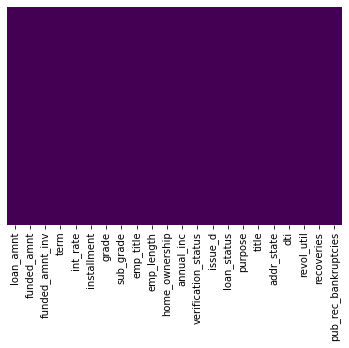

In [21]:
sns.heatmap(loandata.isnull(),yticklabels=False,cbar=False, cmap="viridis")

## Step 4  Data Types Analysis and Conversion

### int_rate needs to be converted to float from string

In [22]:
loandata["int_rate"]=loandata["int_rate"].apply(lambda x: float(x[:-1]))

## Step 5  Data Transformation 
    

### Renaming columns to meaningful name

In [23]:

loandata.rename(columns = {'issue_d':'issue_date','pub_rec_bankruptcies':'public_record_bankruptcies'}, inplace = True)

#### Formatting applied 
##### Column List: 
###### Issue_D : As this column has Month , Year we want to seperate year into issue_d_year and month into issue_d_month
###### emp_length: As this column has values >10 years, 3+ years, we want to convert that to numerical like 3, 10 etc
###### revol_util_rate: Removed % from this column 

In [24]:
#data formatting for issue_d (extract year alone to new column)

def parseData(x):
    lis = x.split("-")
    return '20'+lis[1]
loandata["issue_date_year"]=loandata["issue_date"].apply(lambda x:parseData(x))

#data formatting for parse emp year, process <year, 10+year, 10+year
def parseEmpYear(x):
    if x == 0:
        x= '0'
    if pd.isna(x):
        x = '0' 
    if 'years' in x:
        x = x.replace('years','')
    if 'year' in x:
        x = x.replace('year','')    
    if '<' in x:
        x = x.replace('<','')
    if '+' in x:
        x = x.replace('+','') 
    x = x.strip()    
    return int(x)
loandata['emp_length_year'] = loandata['emp_length'].apply(lambda x:parseEmpYear(x))

#parse revol_util_rate
def parseRevolRate(x):
    x = str(x)
    if x == "":
        x = '0'
    if '%' in x:
        x = x.replace('%','')
    return float(x)
loandata["revol_util_rate"]=loandata["revol_util"].apply(lambda x:parseRevolRate(x))

def parseMon(x):
    lis = x.split("-")
    return lis[0]
loandata["issue_date_month"]=loandata["issue_date"].apply(lambda x:parseMon(x))




## Step - 6 Treating outliers



# Univariate for continuous values

## Checking outliers for continous values
- **int_rate** - no removal of outliers needed as skew and kurtosis is within limits skew(-1, +1) , kurtosis(-7,+7)
- **funded_amnt** - no removal of outliers needed as skew and kurtosis is within limits skew(-1, +1) , kurtosis(-7,+7)
- **funded_amnt_inv** - no removal of outliers needed as skew and kurtosis is within limits skew(-1, +1) , kurtosis(-7,+7)
- **loan_amnt** - We need to remove outliers
- **annual_inc** - We need to remove outliers
- **installment** -  We need to remove outliers
- **dti** - no removal of outliers needed as skew and kurtosis is within limits skew(-1, +1) , kurtosis(-7,+7)




### function for finding thresholds of outliers

In [25]:
def thresholdsforOutliers(column_name):
    q1=loandata[column_name].quantile(q=0.25)
    q3=loandata[column_name].quantile(q=0.75)
    IQR=q3-q1
    upper=q3+(1.5*IQR)
    lower=q1-(1.5*IQR)
    return ({"upper":upper,"lower":lower})


## 1. int_rate


Skew 0.2937286765747475
Kurtosis -0.4466647749329957


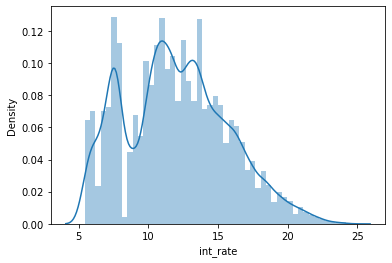

In [26]:
sns.distplot(loandata["int_rate"])
print("Skew", loandata["int_rate"].skew())
print("Kurtosis",loandata["int_rate"].kurtosis())
#looking at outliers

<AxesSubplot:xlabel='int_rate'>

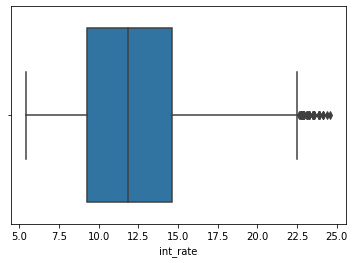

In [27]:
sns.boxplot(loandata["int_rate"])


## 2. Loan Amount - Removing outliers

In [28]:
# q1=loandata['loan_amnt'].quantile(q=0.25)
# q3=loandata['loan_amnt'].quantile(q=0.75)
# IQR=q3-q1
# IQR
thresholds=thresholdsforOutliers('loan_amnt')
loan_upper=thresholds["upper"]
loan_lower=thresholds["lower"]

percentage_removed=len(loandata[loandata['loan_amnt']>loan_upper])/len(loandata)*100
print(round(percentage_removed,2), "% data has loan amount greater than the upper threshold", loan_upper)
percentage_removed_lower=len(loandata[loandata['loan_amnt']<loan_lower])/len(loandata)*100
print(round(percentage_removed_lower,2), "% data has loan amount lesser than the lower threshold", loan_lower)
loandata=loandata[(loandata['loan_amnt'] > loan_lower) & (loandata['loan_amnt'] < loan_upper)]
print("Shape after removing")
loandata.shape

3.1 % data has loan amount greater than the upper threshold 29250.0
0.0 % data has loan amount lesser than the lower threshold -8750.0
Shape after removing


(38487, 26)

Skew 0.7362405646818562
Kurtosis -0.26256950113108113


count    38487.000000
mean     10521.750201
std       6441.089924
min        500.000000
25%       5125.000000
50%       9600.000000
75%      15000.000000
max      29175.000000
Name: loan_amnt, dtype: float64

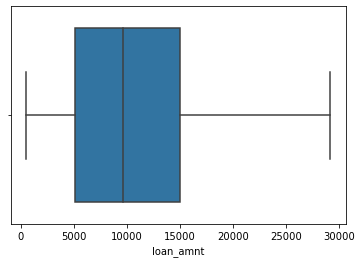

In [29]:
sns.boxplot(loandata["loan_amnt"])

print("Skew", loandata["loan_amnt"].skew())
print("Kurtosis",loandata["loan_amnt"].kurtosis())
loandata["loan_amnt"].describe()

## 3. Funded Amount

Skew 0.756127242792522
Kurtosis -0.14191029653535958


<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

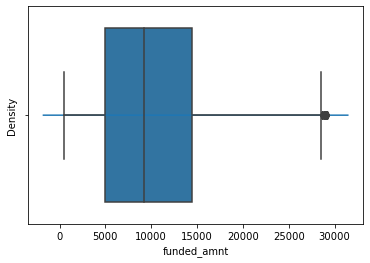

In [30]:
sns.distplot(loandata["funded_amnt"])
print("Skew", loandata["funded_amnt"].skew())
print("Kurtosis",loandata["funded_amnt"].kurtosis())
sns.boxplot(loandata["funded_amnt"])

## 4. Funded Amount Invested

Skew 0.7725696905330575
Kurtosis -0.056250091558897264


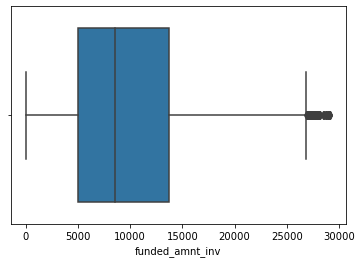

In [31]:
sns.boxplot(loandata["funded_amnt_inv"])
print("Skew", loandata["funded_amnt_inv"].skew())
print("Kurtosis",loandata["funded_amnt_inv"].kurtosis())

## 5. Installment

## Removing outliers


Skew 0.9182901635742915
Kurtosis 0.48526804038527294
2.86 % data has installment greater than the upper threshold 771.58
0.0 % data has installment lesser than the lower threshold -200.18000000000004


(37386, 26)

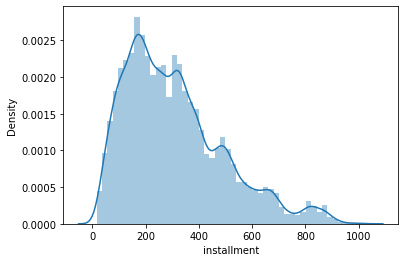

In [32]:

loandata["installment"].describe()
sns.distplot(loandata["installment"])
print("Skew", loandata["installment"].skew())
print("Kurtosis",loandata["installment"].kurtosis())

thresholds=thresholdsforOutliers('installment')
installment_upper=thresholds["upper"]
installment_lower=thresholds["lower"]

percentage_removed=len(loandata[loandata['installment']>installment_upper])/len(loandata)*100
print(round(percentage_removed,2), "% data has installment greater than the upper threshold", installment_upper)
percentage_removed_lower=len(loandata[loandata['installment']<=installment_lower])/len(loandata)*100
print(round(percentage_removed_lower,2), "% data has installment lesser than the lower threshold", installment_lower)

loandata=loandata[(loandata['installment'] > installment_lower) & (loandata['installment'] < installment_upper)]
loandata.shape



## 6. Annual Income
## Removing outliers



<AxesSubplot:xlabel='annual_inc'>

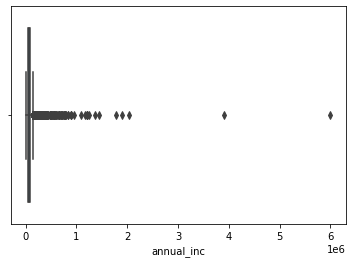

In [33]:
sns.boxplot(loandata["annual_inc"])

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

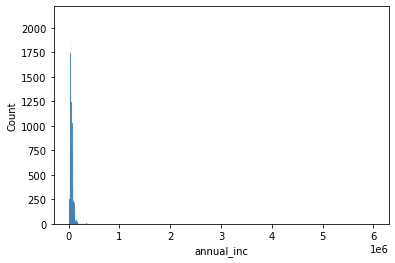

In [34]:
sns.histplot(loandata["annual_inc"])

In [35]:
print("Skew", loandata["annual_inc"].skew())
print("Kurtosis",loandata["annual_inc"].kurtosis())

thresholds=thresholdsforOutliers('annual_inc')
income_upper=thresholds["upper"]
income_lower=thresholds["lower"]

percentage_removed=len(loandata[loandata['annual_inc']>income_upper])/len(loandata)*100
print(round(percentage_removed,2), "% data has annual_inc greater than the upper threshold", income_upper)
percentage_removed_lower=len(loandata[loandata['annual_inc']<=income_lower])/len(loandata)*100
print(round(percentage_removed_lower,2), "% data has annual_inc lesser than the lower threshold", income_lower)

loandata=loandata[(loandata['annual_inc'] > income_lower) & (loandata['annual_inc'] < income_upper)]
loandata.shape


Skew 35.936229449976
Kurtosis 2813.055344080228
4.35 % data has annual_inc greater than the upper threshold 139537.5
0.0 % data has annual_inc lesser than the lower threshold -19722.5


(35760, 26)

(35760, 26)

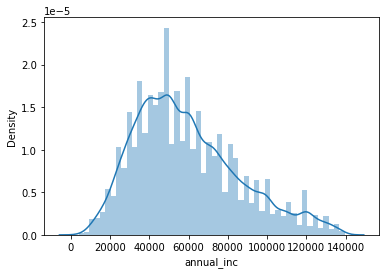

In [36]:
sns.distplot(loandata["annual_inc"])
loandata.shape

## 7. Dti 

<AxesSubplot:xlabel='dti'>

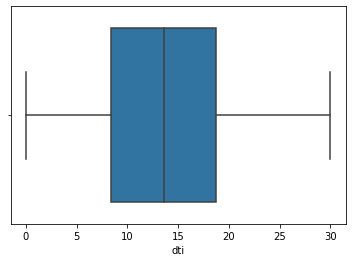

In [37]:
sns.boxplot(loandata["dti"])

## Step 7 Data Summary

In [38]:
loandata.describe()

loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  35760.000000  35760.000000     35760.000000  35760.000000   
mean    9918.379474   9695.822847      9218.086273     11.836579   
std     5939.782488   5707.397946      5694.763736      3.640103   
min      500.000000    500.000000         0.000000      5.420000   
25%     5000.000000   5000.000000      4950.000000      8.900000   
50%     9000.000000   8737.500000      8000.000000     11.710000   
75%    14000.000000  13225.000000     12600.000000     14.270000   
max    29175.000000  29175.000000     29175.000000     24.400000   

        installment     annual_inc           dti    recoveries  \
count  35760.000000   35760.000000  35760.000000  35760.000000   
mean     287.236339   59152.199981     13.465923     78.044395   
std      162.630864   26566.177823      6.679170    544.741675   
min       15.690000    4000.000000      0.000000      0.000000   
25%      160.450000   39996.000000      8.350000      0.000000   
50%      261.010000   55000.000000     13.570000      0.000000   
75%      387.155000   75000.000000     18.760000      0.000000   
max      771.430000  139500.000000     29.990000  21810.310000   

       public_record_bankruptcies  emp_length_year  revol_util_rate  
count                35760.000000     35760.000000     35712.000000  
mean                     0.044799         4.849049        48.575099  
std                      0.207674         3.435516        28.269875  
min                      0.000000         0.000000         0.000000  
25%                      0.000000         2.000000        25.200000  
50%                      0.000000         4.000000        48.800000  
75%                      0.000000         8.000000        72.000000  
max                      2.000000        10.000000        99.900000

In [39]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35760 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   35760 non-null  int64  
 1   funded_amnt                 35760 non-null  int64  
 2   funded_amnt_inv             35760 non-null  float64
 3   term                        35760 non-null  object 
 4   int_rate                    35760 non-null  float64
 5   installment                 35760 non-null  float64
 6   grade                       35760 non-null  object 
 7   sub_grade                   35760 non-null  object 
 8   emp_title                   35760 non-null  object 
 9   emp_length                  35760 non-null  object 
 10  home_ownership              35760 non-null  object 
 11  annual_inc                  35760 non-null  float64
 12  verification_status         35760 non-null  object 
 13  issue_date                  357

### Renaming columns to meaningful names

In [40]:
print("There are a total of", loandata.shape[0] ,"rows and ",loandata.shape[1]," coloumns")

There are a total of 35760 rows and  26  coloumns


## Step 8 -  Data integrity checks
#### Ideally loan_amnt >=  funded_amnt >=  funded_amnt_inv

#### No data quality issues observed

In [41]:

loandata["valid"]=loandata["loan_amnt"]-loandata["funded_amnt"]
loandata["valid"]=loandata["valid"].apply(lambda x: True if x >=0 else False)
loandata["valid"].value_counts()


# check for data issues
#Ideally funded_amnt >= funded_amnt_inv
loandata["valid"]=loandata["funded_amnt"]-loandata["funded_amnt_inv"]
loandata["valid"]=loandata["valid"].apply(lambda x: True if x >=0 else False)
print(loandata["valid"].value_counts())
loandata=loandata.drop(axis=1,  columns=["valid"])

True    35760
Name: valid, dtype: int64


## Step 9 Univariate analysis 

Univariate analysis will lead to futher bucketing of data for analysis

- categorical values and Creating custom columns for analysis
  
- cotinuous values   

### Categorical Variables

## 1. Loan status

<AxesSubplot:ylabel='loan_status'>

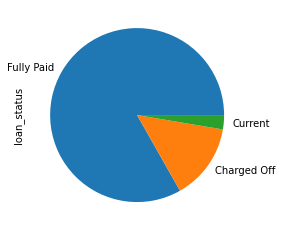

In [42]:
loandata["loan_status"].value_counts().plot(kind='pie')


## Dropping out rows with with loan status=current as it will not be useful for predicting defaulters


In [43]:

loandata=loandata[~(loandata["loan_status"]=="Current")]
loandata.shape

(34815, 26)

## 2. Term

## Observation - Most people applying for loan have a loan term of 36 months

 36 months    26561
 60 months     8254
Name: term, dtype: int64


<AxesSubplot:ylabel='term'>

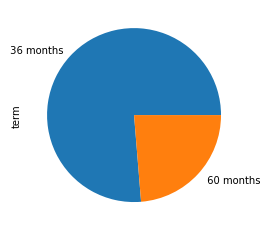

In [44]:

print(loandata["term"].value_counts())
loandata["term"].value_counts().plot(kind='pie')

## 3. Grade and Subgrade

## Observation - Grade A and B seems to have majority of the dataset (57%)

B    0.303174
A    0.272871
C    0.206836
D    0.128364
E    0.061554
F    0.021341
G    0.005860
Name: grade, dtype: float64


Text(0, 0.5, 'Count')

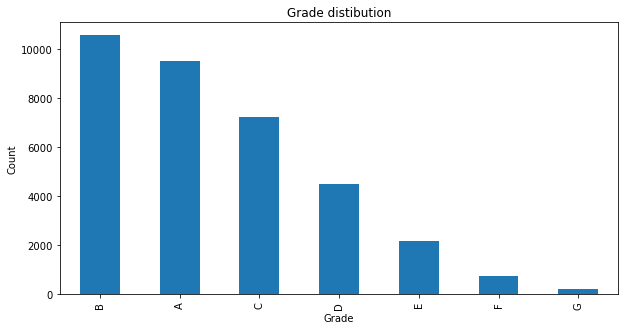

In [45]:
print(loandata["grade"].value_counts(1))
fig=loandata["grade"].value_counts().plot(kind='bar',figsize=(10,5))
fig.set_title('Grade distibution')
fig.set_xlabel('Grade')
fig.set_ylabel('Count')

## 4. Employment title
### Combining all sparse values to Others for easier analysis, created a separate column with transformed data
### Criteria for Others if count <25

In [46]:
loandata["emp_title"].value_counts()
emp_title_array=[]
emp_buckets=loandata["emp_title"].value_counts()
for i, value in emp_buckets.items():
    if(value >= 25):
        emp_title_array.append(i)
loandata["emp_title_modified"]=loandata["emp_title"].apply(lambda x: x if x in emp_title_array  else "Others")
loandata["emp_title_modified"].value_counts()

Others                          31355
None                             2088
US Army                           116
Bank of America                   101
AT&T                               50
US Air Force                       50
Wells Fargo                        47
UPS                                47
USAF                               46
IBM                                45
Kaiser Permanente                  45
Walmart                            43
United States Air Force            40
US ARMY                            36
USPS                               36
Self Employed                      35
Verizon Wireless                   35
Target                             35
U.S. Army                          34
State of California                34
JP Morgan Chase                    33
Department of Defense              32
Booz Allen Hamilton                32
Northrop Grumman                   32
US Navy                            32
Self                               31
JPMorgan Cha

## 5.  Employment length 


### Observation - Employees with 10+ , and <=1 form a greater percentage in loandata


Text(0, 0.5, 'Count')

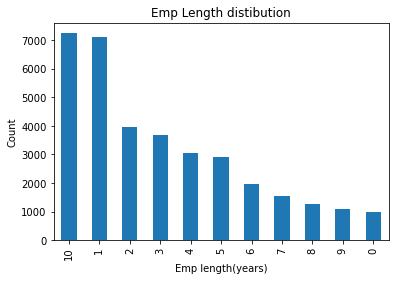

In [47]:

fig=loandata["emp_length_year"].value_counts().plot(kind='bar')
fig.set_title('Emp Length distibution')
fig.set_xlabel('Emp length(years)')
fig.set_ylabel('Count')


## 6. Home ownership
### Removing None and and replacing with OTHER
### No univariate insights from home_ownership

RENT        17420
MORTGAGE    14565
OWN          2738
OTHER          92
Name: home_ownership, dtype: int64

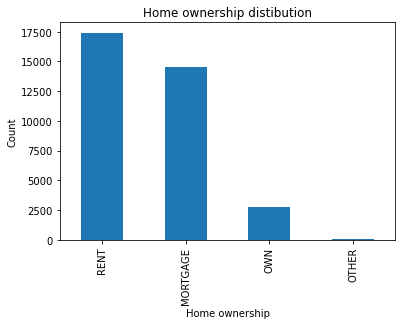

In [48]:
loandata["home_ownership"].value_counts()
loandata["home_ownership"]=loandata["home_ownership"].apply(lambda x: "OTHER" if x =="NONE" else x)
loandata["home_ownership"].value_counts()
fig=loandata["home_ownership"].value_counts().plot(kind="bar")
fig.set_title('Home ownership distibution')
fig.set_xlabel('Home ownership')
fig.set_ylabel('Count')
loandata["home_ownership"].value_counts()

In [49]:
loandata.shape

(34815, 27)

## 7. loan issue date  
#### Analyzing issue date and extracting year as a separate column
## Observation Year 2011 has most people in loandata 
## Observation December has highest number of loan takers

Text(0, 0.5, 'Count')

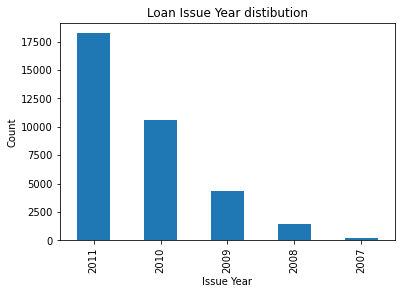

In [50]:
fig=loandata["issue_date_year"].value_counts().plot(kind="bar")
fig.set_title('Loan Issue Year distibution')
fig.set_xlabel('Issue Year')
fig.set_ylabel('Count')
#2011 has most people applying for loans
#within 2011, November has most people applying for loans

Text(0, 0.5, 'Count')

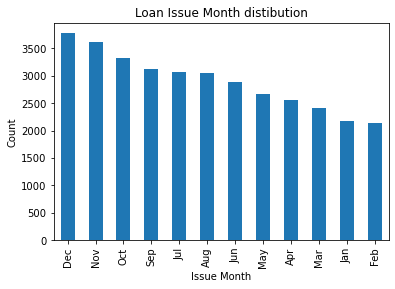

In [51]:
#2011 has most people applying for loans
fig=loandata["issue_date_month"].value_counts().plot(kind="bar")
fig.set_title('Loan Issue Month distibution')
fig.set_xlabel('Issue Month')
fig.set_ylabel('Count')

## 8. Verification status
## Observation - Most loan applicants have verification status as non-verified

Text(0, 0.5, 'Count')

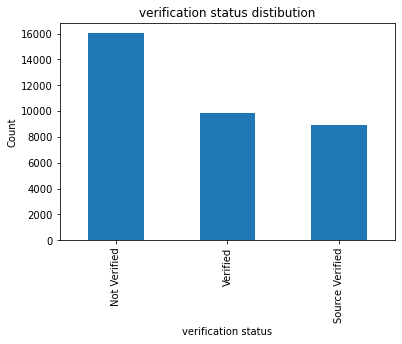

In [52]:
fig=loandata["verification_status"].value_counts().plot(kind="bar")
fig.set_title('verification status distibution')
fig.set_xlabel('verification status')
fig.set_ylabel('Count')

## 9. Purpose
## Observation - most people have debt_consolidation as purpose

In [53]:
loandata["purpose"].value_counts()

debt_consolidation    16257
credit_card            4539
other                  3613
home_improvement       2415
major_purchase         1993
small_business         1445
car                    1439
wedding                 867
medical                 634
moving                  539
vacation                363
house                   314
educational             306
renewable_energy         91
Name: purpose, dtype: int64

## 10. Title 
## Observation - After analyzing title column, most occuring title are related to debt consolidation
### Hence this can be dropped as debt consolidation is already captured in purpose

In [54]:
loandata["title"].value_counts()

Debt Consolidation                       1825
Debt Consolidation Loan                  1397
Personal Loan                             585
debt consolidation                        424
Consolidation                             421
                                         ... 
Used car,debt consolidation loan            1
LC2                                         1
Card Reduction                              1
Consolidating Debt at a lower rate...       1
MBA Loan Consolidation                      1
Name: title, Length: 17731, dtype: int64

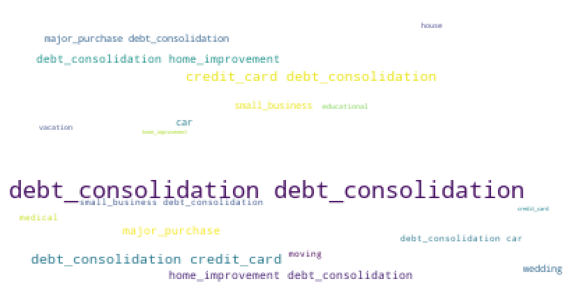

In [55]:
%matplotlib inline
mpl.rcParams['figure.figsize']=(10,10)             
mpl.rcParams['savefig.dpi']=100      
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_font_size=150, 
                          random_state=0
                         ).generate(' '.join(loandata['purpose'].tolist()))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [56]:
loandata=loandata.drop(axis=1,  columns=["title"])

## 11. Address State
## Observation - Most loan appliers from CA

Text(0, 0.5, 'Count')

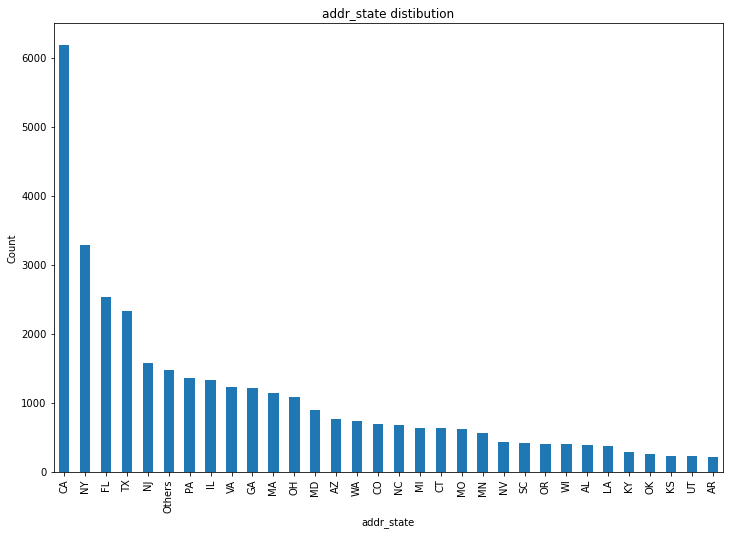

In [57]:
#most loan appliers from CA
statestoconsider=[]
for i,value in loandata["addr_state"].value_counts().items():
    if value >=200:
        statestoconsider.append(i)
statestoconsider
    
loandata["addr_state"]=loandata["addr_state"].apply(lambda x: x if x in statestoconsider else "Others")
fig=loandata["addr_state"].value_counts().plot(kind="bar", figsize=(12,8))
fig.set_title('addr_state distibution')
fig.set_xlabel('addr_state')
fig.set_ylabel('Count')

## 12.  pub_rec_bankruptcies
## Observation - Majority loan appliers have 0 bankruptcies

Text(0, 0.5, 'Count')

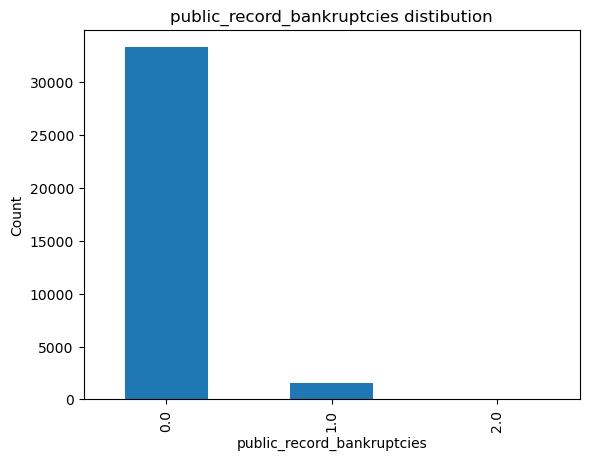

In [58]:
mpl.style.use('default') 
fig=loandata["public_record_bankruptcies"].value_counts().plot(kind="bar")
fig.set_title('public_record_bankruptcies distibution')
fig.set_xlabel('public_record_bankruptcies')
fig.set_ylabel('Count')

In [59]:
loandata.shape
loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34815 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   34815 non-null  int64  
 1   funded_amnt                 34815 non-null  int64  
 2   funded_amnt_inv             34815 non-null  float64
 3   term                        34815 non-null  object 
 4   int_rate                    34815 non-null  float64
 5   installment                 34815 non-null  float64
 6   grade                       34815 non-null  object 
 7   sub_grade                   34815 non-null  object 
 8   emp_title                   34815 non-null  object 
 9   emp_length                  34815 non-null  object 
 10  home_ownership              34815 non-null  object 
 11  annual_inc                  34815 non-null  float64
 12  verification_status         34815 non-null  object 
 13  issue_date                  348

### Continuous/ Numerical variables

### 1. Loan_amnt

### Observation- Peaks at whole numbers - 5000, 10000, 15000, 25000

Text(0.5, 1.0, 'Loan Amount distibution')

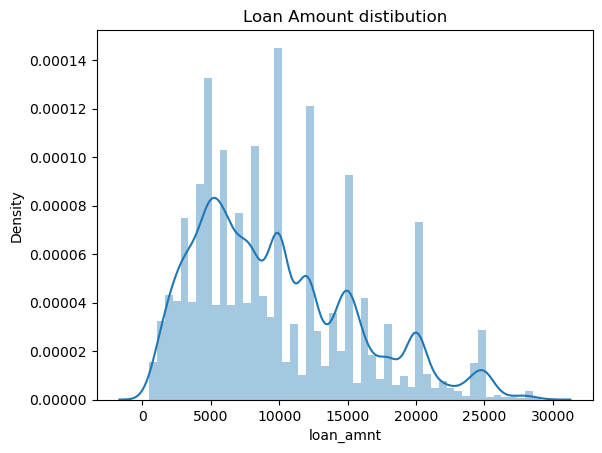

In [60]:
fig=sns.distplot(loandata["loan_amnt"])
fig.set_title('Loan Amount distibution')

### 2. funded_amnt

### Observation- Peaks at whole numbers - 5000, 10000, 15000, 25000

Text(0.5, 1.0, 'Funded Amount distibution')

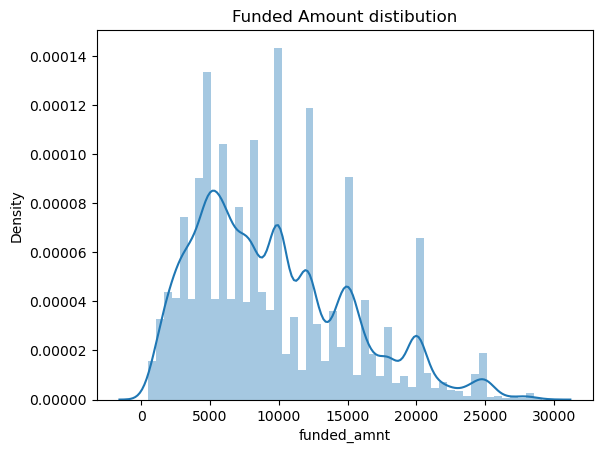

In [61]:
fig=sns.distplot(loandata["funded_amnt"])
fig.set_title('Funded Amount distibution')

### 3. funded_amnt_inv

### Observation- Peaks at whole numbers - 5000, 10000, 15000, 25000

Text(0.5, 1.0, 'Funded Amount Invested distibution')

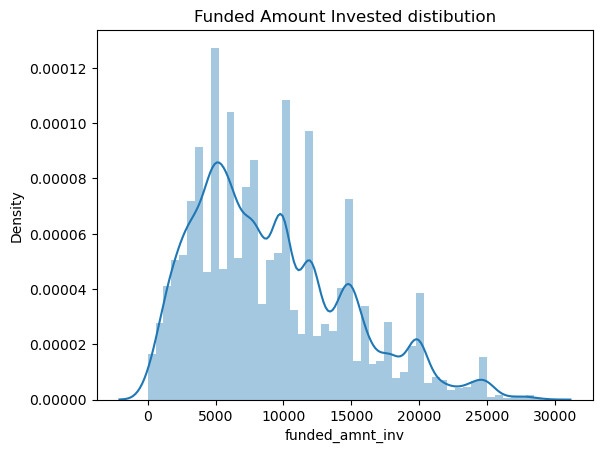

In [62]:
fig=sns.distplot(loandata["funded_amnt_inv"])
fig.set_title('Funded Amount Invested distibution')

### 4. Dti

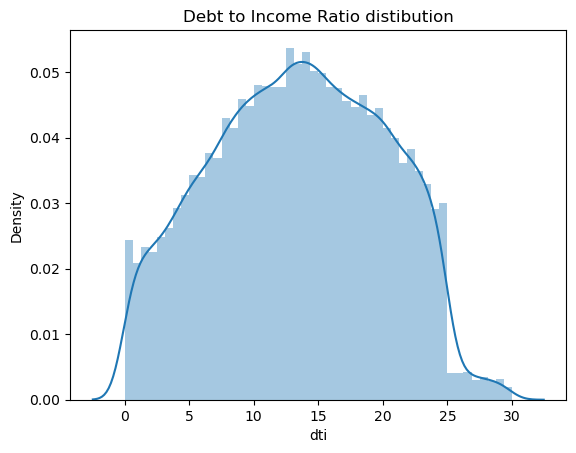

In [63]:
fig=sns.distplot(loandata["dti"])
fig.set_title('Debt to Income Ratio distibution')
loandata["dti_bkt"]=pd.cut(loandata.dti,5)


Text(0, 0.5, 'Count')

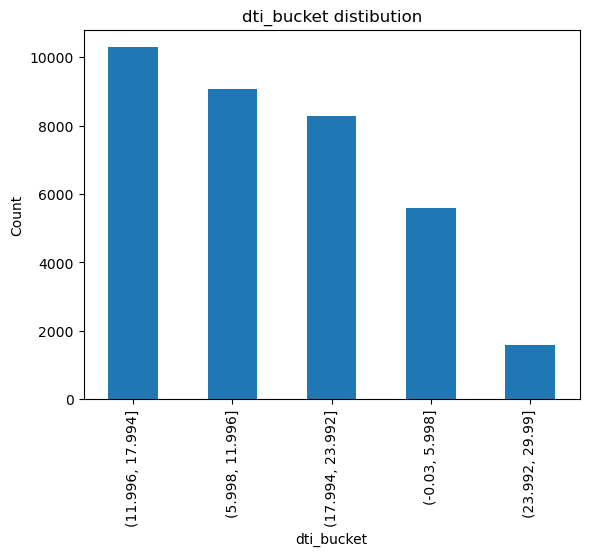

In [64]:
fig=loandata["dti_bkt"].value_counts().plot(kind="bar")
fig.set_title('dti_bucket distibution')
fig.set_xlabel('dti_bucket')
fig.set_ylabel('Count')

### 5. int_rate

Text(0.5, 1.0, 'Interest Rate distibution')

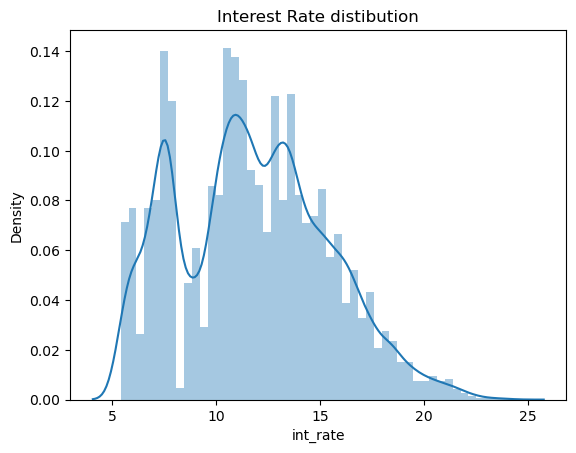

In [65]:
fig=sns.distplot(loandata["int_rate"])
fig.set_title('Interest Rate distibution')

## Step 10 - Bivariate analysis 




### Separating loan status to 2 diff data set for further analysis

In [66]:
loandata_chargedoff = loandata[loandata["loan_status"] == 'Charged Off']
loandata_paid = loandata[loandata["loan_status"] == 'Fully Paid']

### Observation: when we group them by interest rate bucket , higher the interest rate count of increasing charged off is increasing and fully paid is decreasing

<AxesSubplot:xlabel='int_bkt'>

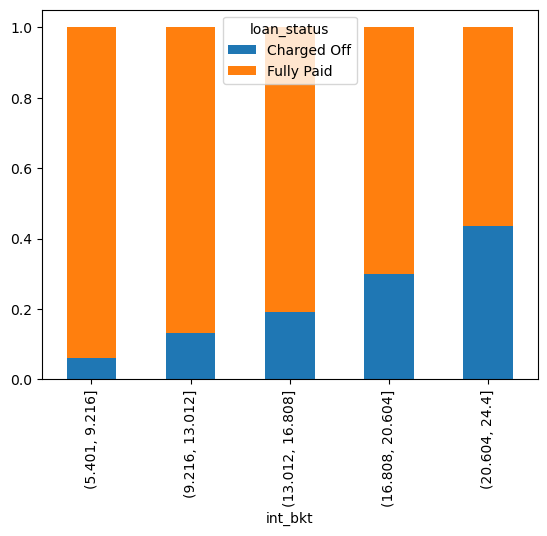

In [67]:
loandata['int_bkt'] = pd.cut(loandata.int_rate,5)
loandata['int_bkt']
loandata.groupby('int_bkt').loan_status.value_counts(1).unstack().plot(kind='bar',stacked=True)
#Inf: when we group them by interest rate bucket , higher the interest rate count of 
#is increasing charged off and fully paid is decreasing

## Loan status vs employment length

### Observation - employment length is not conclusive for any trend

### Observation - if employment length is NA(plotted as 0) in graph ,  has higher chance of charged off as compared to others

In [68]:
loandata.groupby('emp_length_year').loan_status.value_counts(1)*100

emp_length_year  loan_status
0                Fully Paid     77.811550
                 Charged Off    22.188450
1                Fully Paid     85.744412
                 Charged Off    14.255588
2                Fully Paid     86.823470
                 Charged Off    13.176530
3                Fully Paid     86.301743
                 Charged Off    13.698257
4                Fully Paid     86.426230
                 Charged Off    13.573770
5                Fully Paid     85.669997
                 Charged Off    14.330003
6                Fully Paid     85.902637
                 Charged Off    14.097363
7                Fully Paid     84.640103
                 Charged Off    15.359897
8                Fully Paid     85.555556
                 Charged Off    14.444444
9                Fully Paid     86.972477
                 Charged Off    13.027523
10               Fully Paid     84.389639
                 Charged Off    15.610361
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length_year,loan_status'>

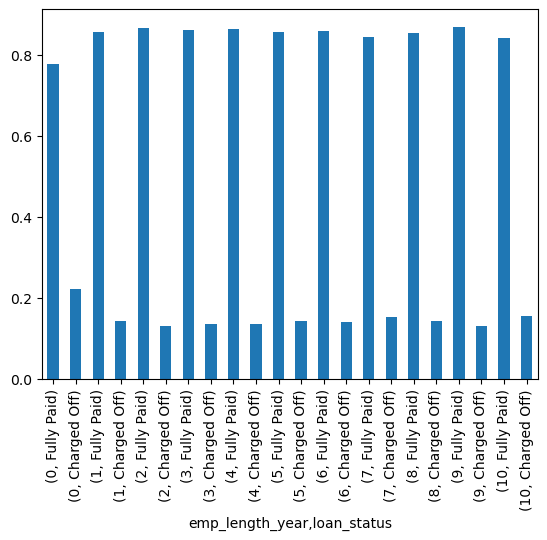

In [69]:
loandata.groupby('emp_length_year').loan_status.value_counts(1).plot(kind="bar")


## Loan status vs Loan Amount

### Insight:  Loan bucket 23K-30k have highest percentage chargeoff
### Trend- As loan amount increases, % charged off increases
### Because of correlation, loan amount , funded amount, funded_amnt_inv, installment will follow similar trend

<AxesSubplot:xlabel='loan_bkt'>

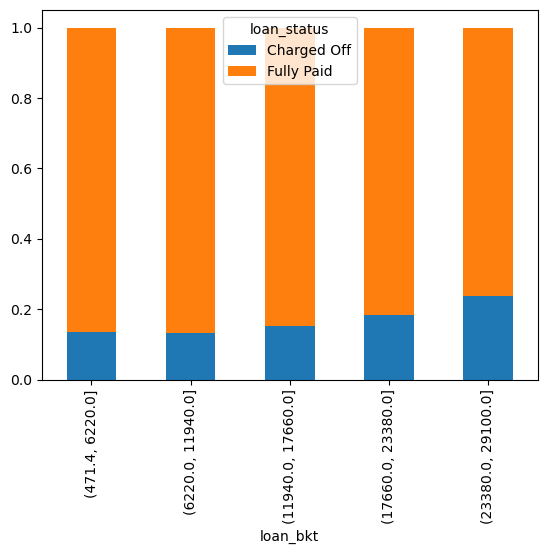

In [70]:
loandata['loan_bkt'] = pd.cut(loandata.loan_amnt,5)
loandata['loan_bkt'].value_counts(1)*100
loandata.groupby('loan_bkt').loan_status.value_counts(1).unstack().plot(kind='bar',stacked=True)

## Loan status vs issue date
### Trends- Across all months dec have got max charged off
### Across all years and dec 2011 have for max charged off


issue_date_month  loan_status
Apr               Fully Paid     87.100546
                  Charged Off    12.899454
Aug               Fully Paid     86.125654
                  Charged Off    13.874346
Dec               Fully Paid     83.840254
                  Charged Off    16.159746
Feb               Fully Paid     87.505828
                  Charged Off    12.494172
Jan               Fully Paid     86.390805
                  Charged Off    13.609195
Jul               Fully Paid     85.858916
                  Charged Off    14.141084
Jun               Fully Paid     84.820194
                  Charged Off    15.179806
Mar               Fully Paid     87.412008
                  Charged Off    12.587992
May               Fully Paid     84.202627
                  Charged Off    15.797373
Nov               Fully Paid     85.243632
                  Charged Off    14.756368
Oct               Fully Paid     85.025610
                  Charged Off    14.974390
Sep               Fully 

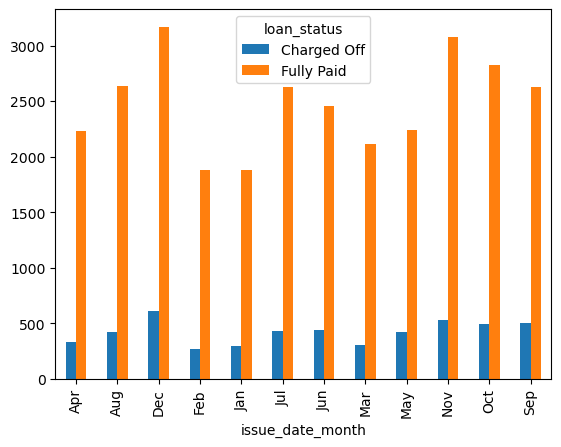

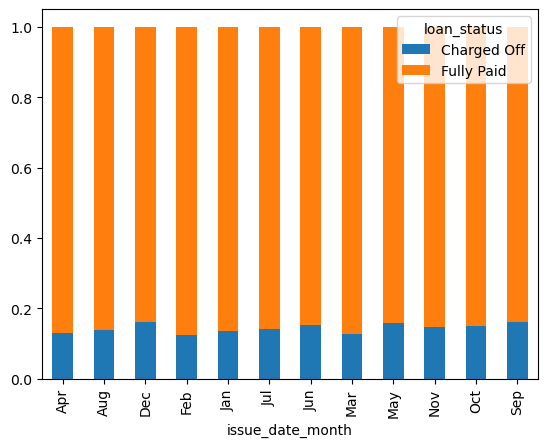

In [71]:
loandata.groupby('issue_date_month').loan_status.value_counts().unstack().plot(kind='bar')
loandata.groupby('issue_date_month').loan_status.value_counts(1).unstack().plot(kind='bar',stacked=True)
loandata.groupby('issue_date_month').loan_status.value_counts(1)*100

## Loan Status vs Income Bucket
### Trends- As income increases increases, % charged off decreases
### Income <60k has a higher chance of charged off

<AxesSubplot:xlabel='income_bkt'>

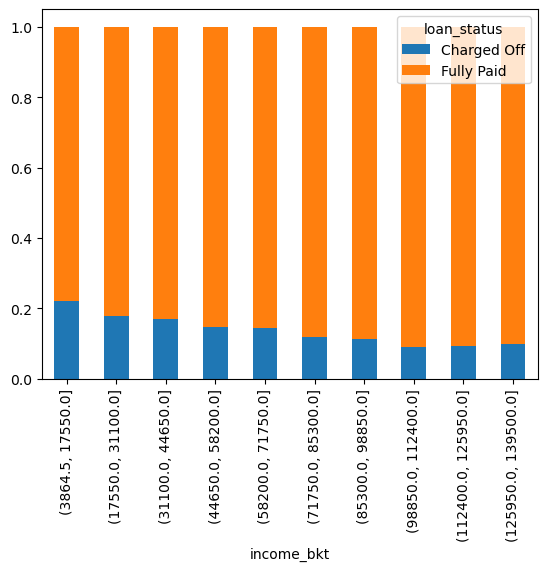

In [72]:
loandata['income_bkt'] = pd.cut(loandata.annual_inc,10)
loandata['income_bkt'].value_counts(1)*100
loandata.groupby('income_bkt').loan_status.value_counts(1).unstack().plot(kind='bar',stacked=True)

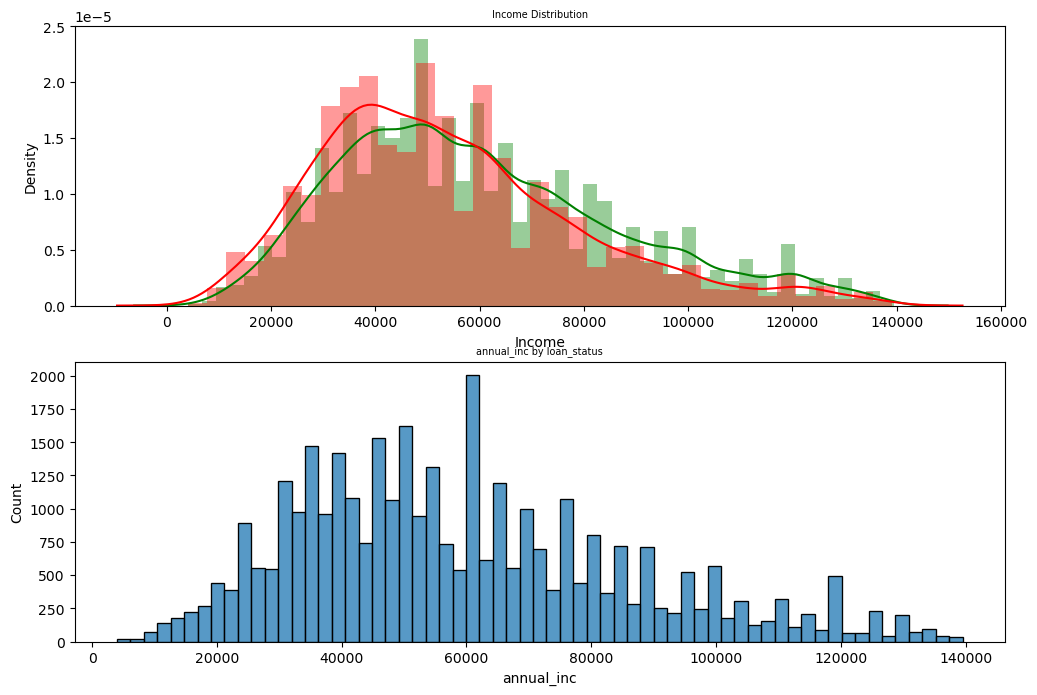

In [74]:
# Income <60k has a higher chance of charged off
# defaulted vs non defaulted
fig, ax = plt.subplots(nrows=2, figsize=(12,8))

g1 = sns.distplot(loandata_paid["annual_inc"], ax=ax[0], 
             color="g")

g1 = sns.distplot(loandata_chargedoff["annual_inc"], ax=ax[0], 
             color='r')
g1.set_title("Income Distribution", fontsize=7)
g1.set_xlabel("Income")

g2 = sns.histplot(x="annual_inc",data=loandata)
g2.set_title("annual_inc by loan_status", fontsize=7)
g2.set_xlabel("annual_inc")
plt.show()

## Loan Status vs Installment
### It is not conclusive

<AxesSubplot:xlabel='installment_buckets'>

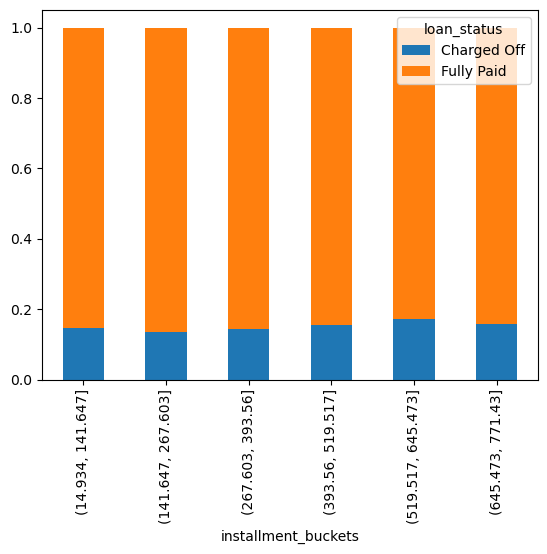

In [75]:

loandata["installment_buckets"]=pd.cut(loandata["installment"],6)
loandata["installment_buckets"].value_counts()
loandata.groupby('installment_buckets').loan_status.value_counts(1).unstack().plot(kind='bar', stacked='True')

## Loan Status vs Employee Title
## Insights-  title as Accenture has no charged off, while Wallmart has highest Charged off
## if employee title is null, higher chance of charged off

In [76]:
emp_title_array=[]
emp_buckets=loandata["emp_title"].value_counts()
for i, value in emp_buckets.items():
    if(value >= 25):
        emp_title_array.append(i)
loandata["emp_title_modified"]=loandata["emp_title"].apply(lambda x: x if x in emp_title_array  else "Others")
loandata["emp_title_modified"].value_counts()

Others                          31355
None                             2088
US Army                           116
Bank of America                   101
AT&T                               50
US Air Force                       50
Wells Fargo                        47
UPS                                47
USAF                               46
IBM                                45
Kaiser Permanente                  45
Walmart                            43
United States Air Force            40
US ARMY                            36
USPS                               36
Self Employed                      35
Verizon Wireless                   35
Target                             35
U.S. Army                          34
State of California                34
JP Morgan Chase                    33
Department of Defense              32
Booz Allen Hamilton                32
Northrop Grumman                   32
US Navy                            32
Self                               31
JPMorgan Cha

<AxesSubplot:xlabel='emp_title_modified'>

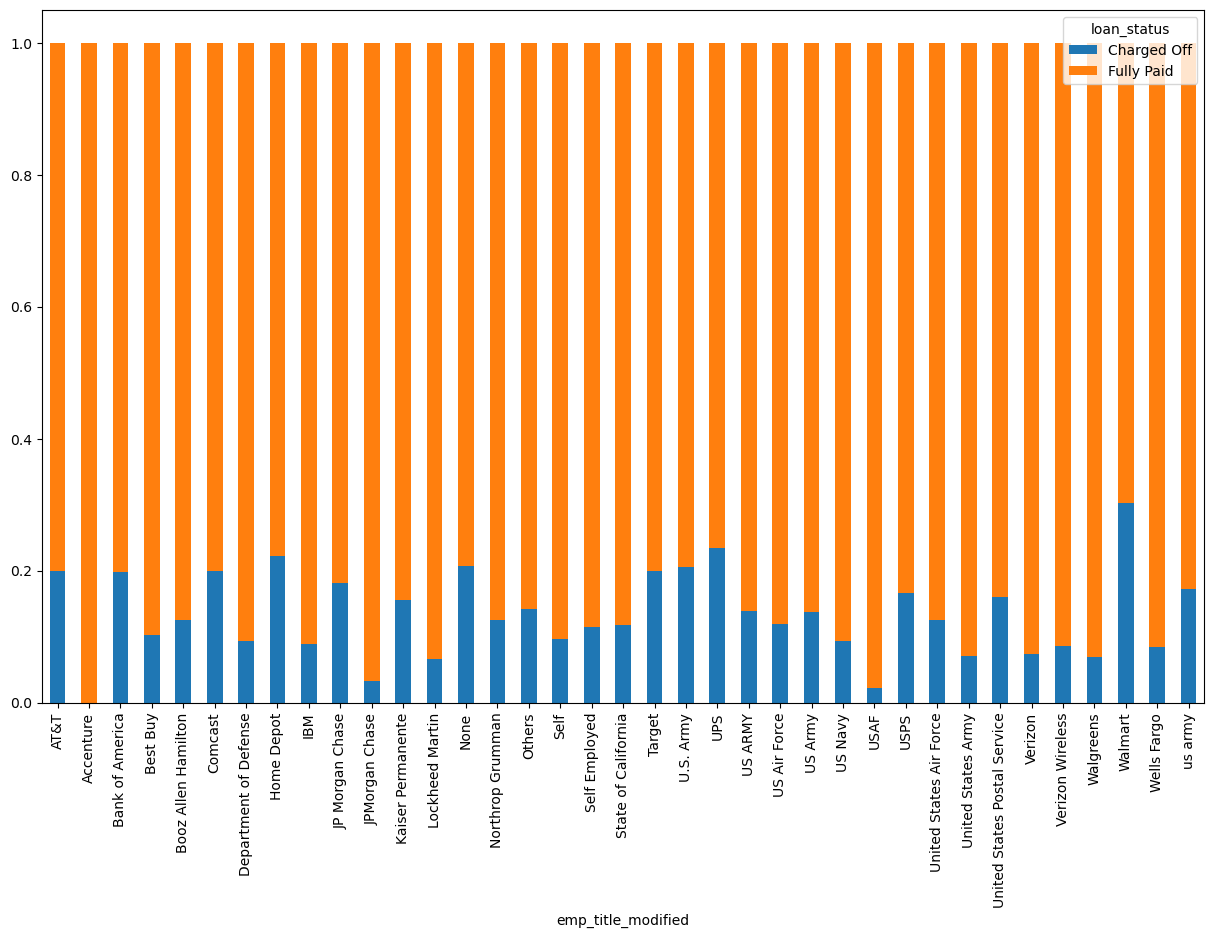

In [77]:

loandata.groupby('emp_title_modified').loan_status.value_counts(1).unstack().plot(kind='bar',stacked=True, figsize=(15, 9))

#Wallmart has a higher percentage of charged off and Accenture has no charged Off

In [78]:

loandata["emp_title"]
loandata["emp_title_absent"]=loandata["emp_title"].isna()

loandata["emp_title_absent"].value_counts()
loandata.groupby('emp_title_absent').loan_status.value_counts(1)

emp_title_absent  loan_status
False             Fully Paid     0.854632
                  Charged Off    0.145368
Name: loan_status, dtype: float64

## loan status vs home ownership
### not conclusive

In [79]:
#people will own home have a very small prcentage in this data of loan
loandata["home_ownership"].value_counts()

RENT        17420
MORTGAGE    14565
OWN          2738
OTHER          92
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='home_ownership'>

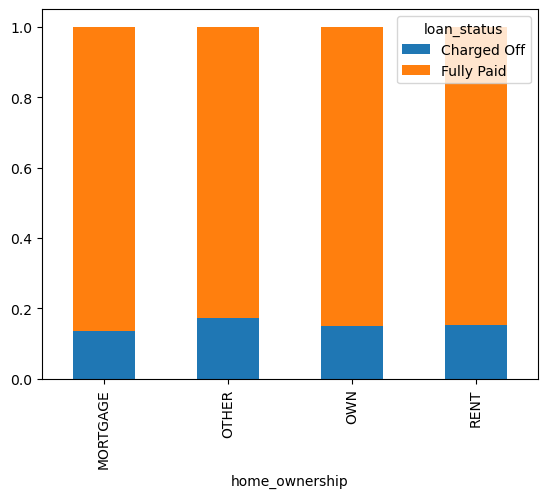

In [80]:

loandata.groupby('home_ownership').loan_status.value_counts(1).unstack().plot(kind='bar',stacked=True)


## loan status vs bankrupties
### Insights - If bankruptcy is 2, highest(40%) chance of charged off

public_record_bankruptcies  loan_status
0.0                         Fully Paid     85.817821
                            Charged Off    14.182179
1.0                         Fully Paid     77.970456
                            Charged Off    22.029544
2.0                         Fully Paid     60.000000
                            Charged Off    40.000000
Name: loan_status, dtype: float64


<AxesSubplot:xlabel='public_record_bankruptcies'>

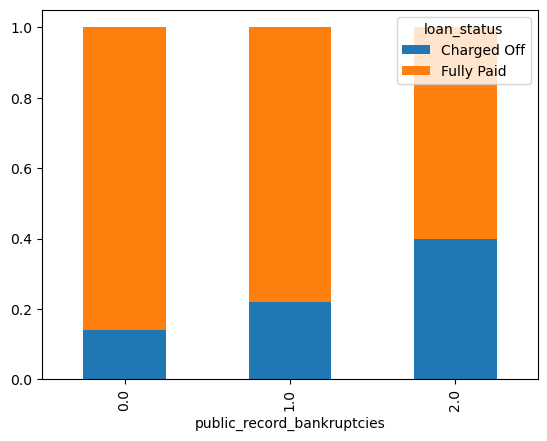

In [81]:
print(loandata.groupby('public_record_bankruptcies').loan_status.value_counts(1)*100)
#people with two bankruptcies have a higher chance of charge off
#charged off increases with bankruptcy
loandata.groupby('public_record_bankruptcies').loan_status.value_counts(1).unstack().plot(kind='bar',stacked='True')



## loan status vs term
### Insights : chance of charged off is double when term is 60

term        loan_status
 36 months  Fully Paid     0.888445
            Charged Off    0.111555
 60 months  Fully Paid     0.745820
            Charged Off    0.254180
Name: loan_status, dtype: float64


<AxesSubplot:xlabel='term'>

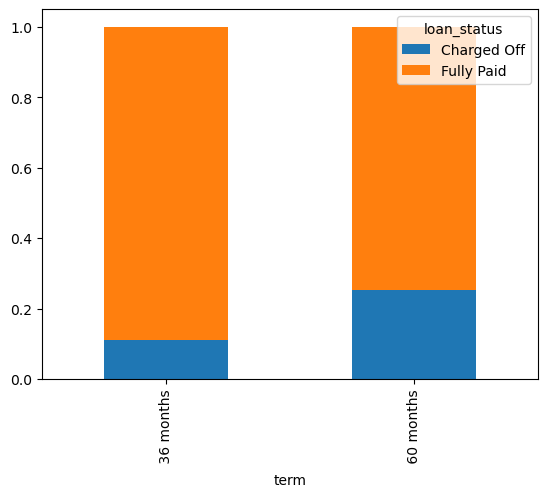

In [82]:
# charged off percentage is double when term is 60
print(loandata.groupby('term').loan_status.value_counts(1))
loandata.groupby('term').loan_status.value_counts(1).unstack().plot(kind='bar',stacked='True')

## loan status vs dti
### dti is not showing a trend, 18-24% has comparitively higher chance of charged off 

In [83]:
loandata["dti_bkt"]=pd.cut(loandata.dti,5,labels=["0-6","6-12","12-18","18-24","24-30"])

In [84]:
loandata["dti_bkt"].value_counts()

12-18    10285
6-12      9079
18-24     8276
0-6       5588
24-30     1587
Name: dti_bkt, dtype: int64

<AxesSubplot:xlabel='dti_bkt'>

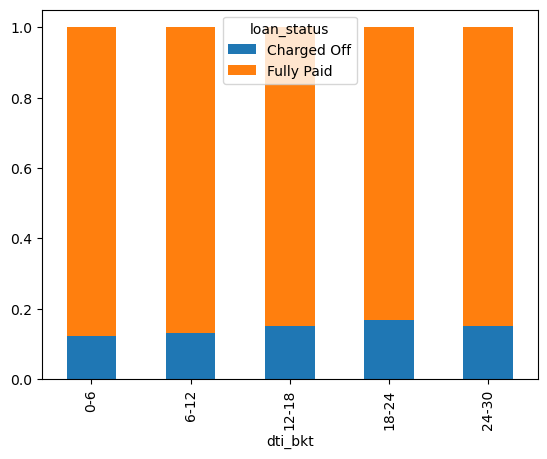

In [85]:
loandata.groupby('dti_bkt').loan_status.value_counts(1).unstack().plot(kind='bar',stacked='True')
# as dti increases , percentage chargeoff increases

## loan status vs verification_status
### verification_status is not conclusive for loan status

<AxesSubplot:xlabel='verification_status'>

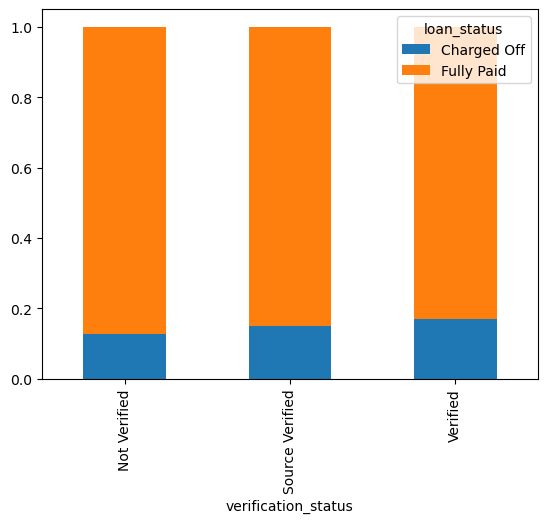

In [86]:
#verification_status no trends

loandata["verification_status"].value_counts()
loandata.groupby('verification_status').loan_status.value_counts(1).unstack().plot(kind='bar',stacked='True')

## loan status vs purpose
### Insights: If purpose=Small business, it has highest(27%) chance of charged off 


<AxesSubplot:xlabel='purpose'>

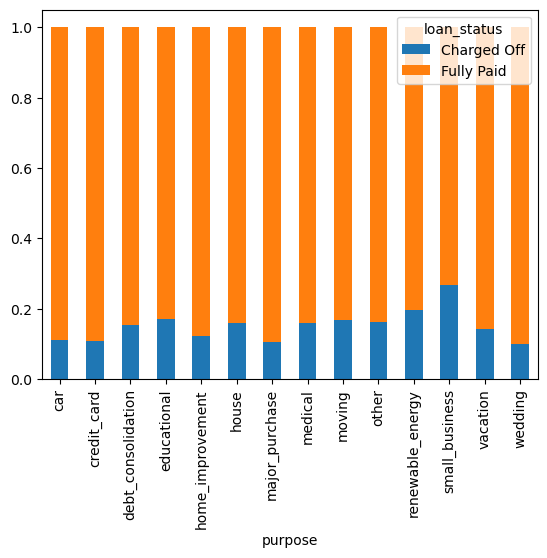

In [87]:
#small_business has a higher chance of charged off, wedding, car and credit card has lowest probability of charged off  
loandata.groupby('purpose').loan_status.value_counts(1).unstack().plot(kind='bar',stacked='True')

## loan_status vs month
### Not conclusive



<AxesSubplot:xlabel='issue_date_month'>

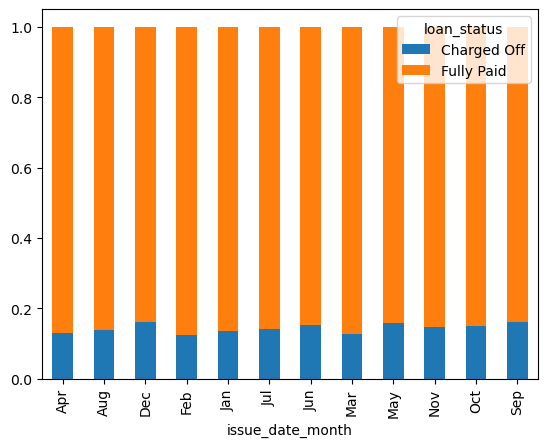

In [88]:
loandata.groupby('issue_date_month').loan_status.value_counts(1).unstack().plot(kind='bar',stacked='True')

## loanstatus vs subgrade
## As subgrade increases, % charged off increases
## Charged off probability is very high(50%) for F5

<AxesSubplot:xlabel='sub_grade'>

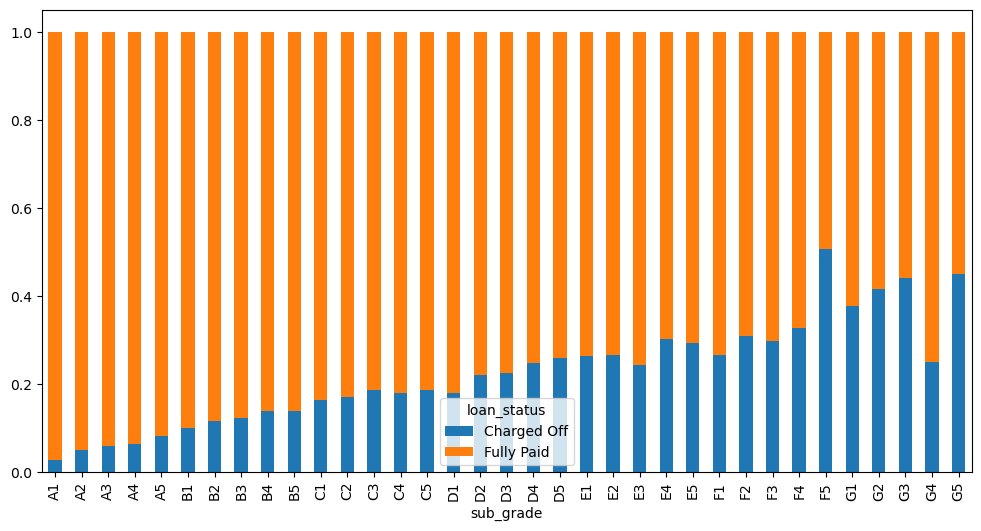

In [89]:
loandata.groupby('sub_grade').loan_status.value_counts(1).unstack().plot(kind='bar',stacked='True', figsize=(12, 6))

## loanstatus vs grade
## As grade increases(A to B to C), % charged off increases


<AxesSubplot:xlabel='grade'>

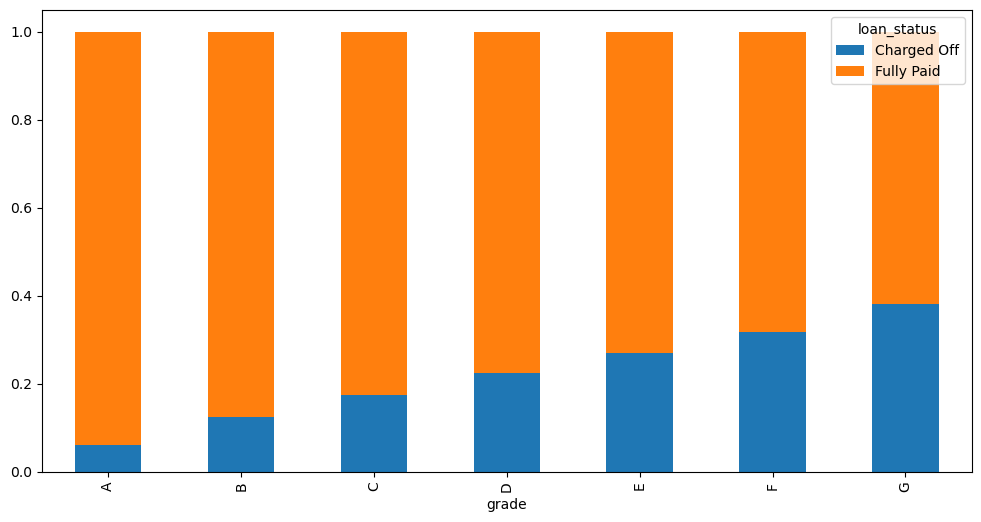

In [90]:
loandata.groupby('grade').loan_status.value_counts(1).unstack().plot(kind='bar', figsize=(12, 6), stacked=True)

## loan_status vs addr_state
### Even if we see slight variations in trends, we cannot conclude as demographics should not be a concluding factor for banking

<AxesSubplot:xlabel='addr_state'>

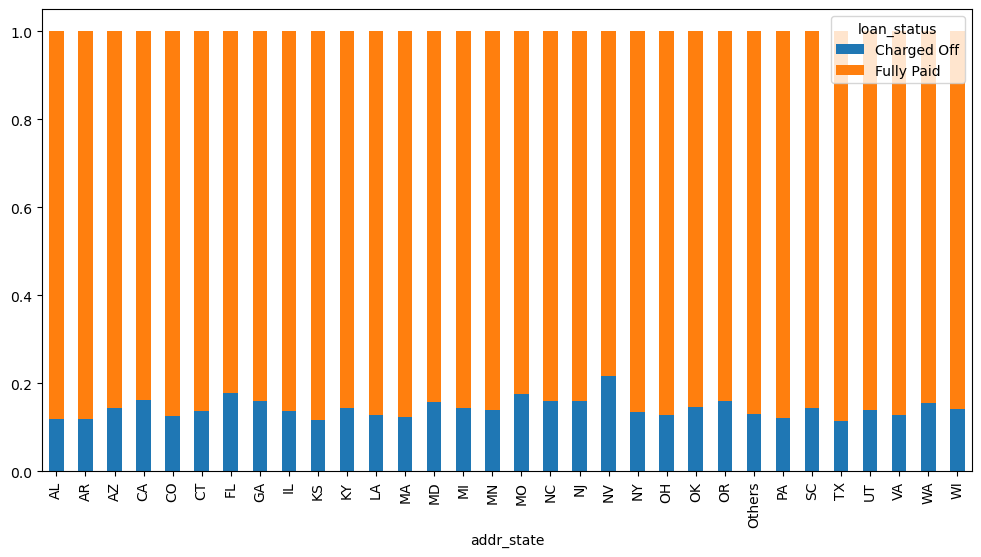

In [91]:
loandata.groupby('addr_state').loan_status.value_counts(1).unstack().plot(kind='bar',stacked='True', figsize=(12, 6))

addr_state  loan_status
AL          Fully Paid     0.880597
            Charged Off    0.119403
AR          Fully Paid     0.881818
            Charged Off    0.118182
AZ          Fully Paid     0.855670
                             ...   
VA          Charged Off    0.128433
WA          Fully Paid     0.845845
            Charged Off    0.154155
WI          Fully Paid     0.859259
            Charged Off    0.140741
Name: loan_status, Length: 64, dtype: float64

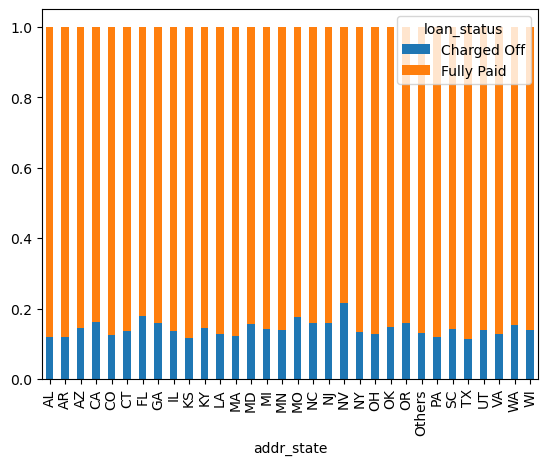

In [92]:
loandata.groupby('addr_state').loan_status.value_counts(1).unstack().plot(kind='bar',stacked=True)  
loandata.groupby('addr_state').loan_status.value_counts(1)

### Analysis on Charged off dataset

### Observation in Charged off Data: Acrss all years among charged off loan status 2011 have got more max
#### Year by Year charged off increasing 

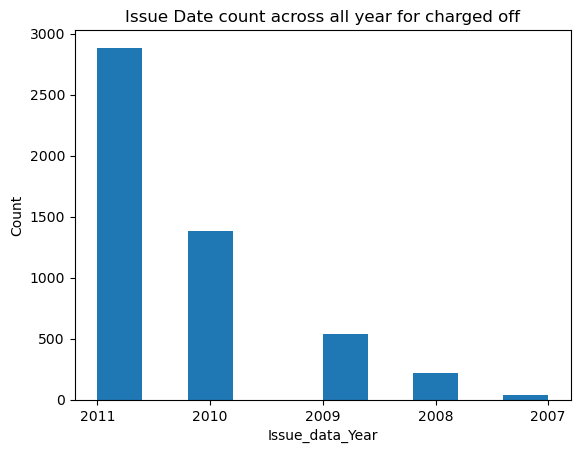

2011    2885
2010    1381
2009     538
2008     221
2007      36
Name: issue_date_year, dtype: int64

In [93]:
plt.hist(loandata_chargedoff["issue_date_year"])
plt.title("Issue Date count across all year for charged off")
plt.xlabel("Issue_data_Year")
plt.ylabel("Count")
plt.show()
loandata_chargedoff["issue_date_year"].value_counts()

### Observation in Charged off Data: Across all months among charged off loan status Dec month have got more max

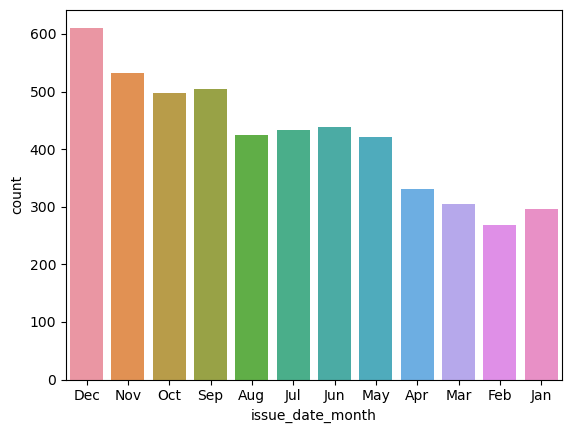

Dec    611
Nov    533
Sep    504
Oct    497
Jun    439
Jul    433
Aug    424
May    421
Apr    331
Mar    304
Jan    296
Feb    268
Name: issue_date_month, dtype: int64

In [94]:
sns.countplot(x='issue_date_month',data=loandata_chargedoff)
plt.show()
loandata_chargedoff["issue_date_month"].value_counts()


### Observation in Charged off Data: Across all dec months 2011 has got max charged off

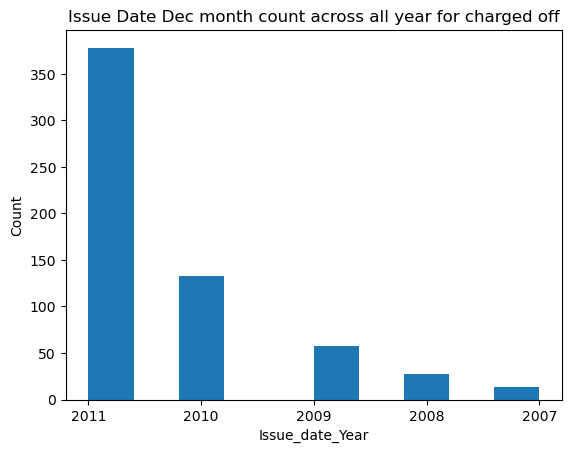

2011    378
2010    133
2009     58
2008     28
2007     14
Name: issue_date_year, dtype: int64

In [95]:
loandata_chargedoff_dec = loandata_chargedoff[loandata_chargedoff["issue_date_month"] == 'Dec']
plt.hist(loandata_chargedoff_dec["issue_date_year"])
plt.title("Issue Date Dec month count across all year for charged off")
plt.xlabel("Issue_date_Year")
plt.ylabel("Count")
plt.show()
loandata_chargedoff_dec["issue_date_year"].value_counts()

### Observation in Charged off Data: Across all home ownership home ownership-RENT has got max charged off

<AxesSubplot:xlabel='home_ownership'>

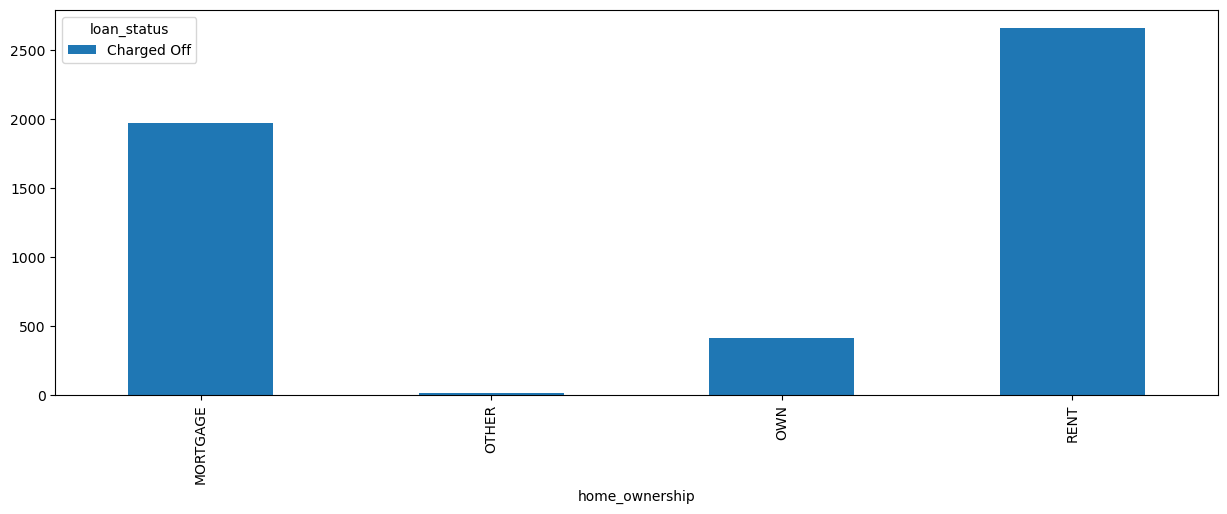

In [96]:
loandata_chargedoff.groupby('home_ownership').loan_status.value_counts().unstack().plot(kind='bar',figsize=(15,5))


### Observation in Charged off Data: Across all state CA has got max charged off among all other state . Off course CA has more fully paid as well. 

<AxesSubplot:xlabel='addr_state'>

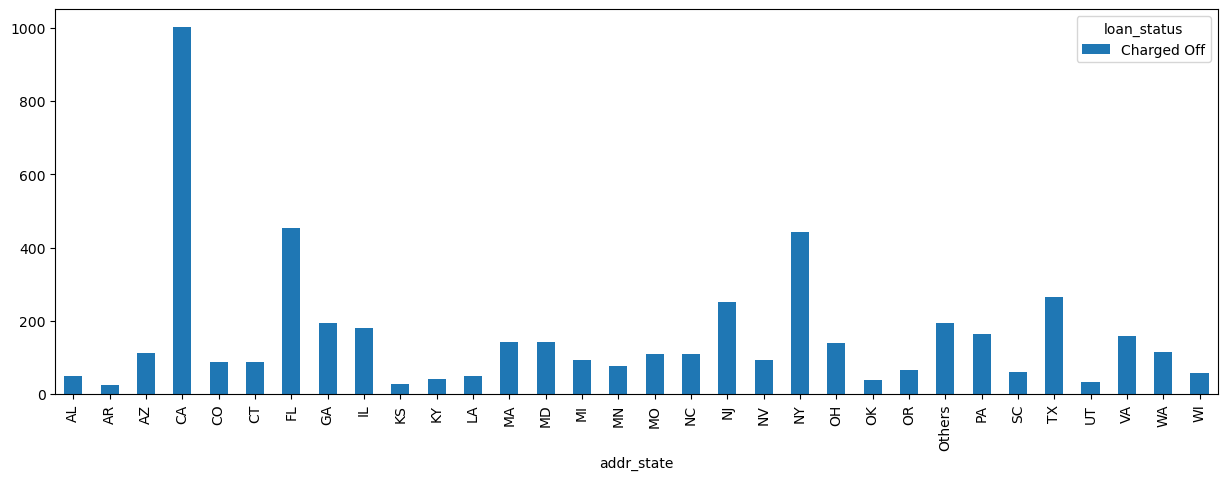

In [97]:
loandata_chargedoff.groupby('addr_state').loan_status.value_counts().unstack().plot(kind='bar',figsize=(15,5))


## Step 11 - Multivariate analysis 

## Observation - If loan applicant falls in Grade G and lesser annual Income chance of default is high


In [ ]:

tr0 = go.Box(
    y=loandata_paid["annual_inc"],
    x=loandata_paid["grade"],
    name='Fully Paid',
    marker=dict(
        color='#3D9970'
    )
)

tr1 = go.Box(
    y=loandata_chargedoff['annual_inc'],
    x=loandata_chargedoff['grade'],
    name='Charged Off',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [tr0, tr1]

layout = go.Layout(
    yaxis=dict(
        title='Annul Income',
        zeroline=False
    ),
    xaxis=dict(
        title='grade'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

### When purpose  is home improvement, major purpose, moving,small business  and income is lower respectively then higher chance of charged off 

In [ ]:

tr0 = go.Box(
    y=loandata_paid["annual_inc"],
    x=loandata_paid["purpose"],
    name='Fully Paid',
    marker=dict(
        color='#3D9970'
    )
)

tr1 = go.Box(
    y=loandata_chargedoff['annual_inc'],
    x=loandata_chargedoff['purpose'],
    name='Charged Off',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [tr0, tr1]

layout = go.Layout(
    yaxis=dict(
        title='Income',
        zeroline=False
    ),
    xaxis=dict(
        title='Purpose'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

### Insights- for all purposes highet dti means higher chance of charged off, but educational, lower dti also leads to chargeoff

### For educational lower dti also leads to chargeoff, as people taking educational loan may not always be earning


In [106]:

tr0 = go.Box(
    y=loandata_paid["dti"],
    x=loandata_paid["purpose"],
    name='Fully Paid',
    marker=dict(
        color='#3D9970'
    )
)

tr1 = go.Box(
    y=loandata_chargedoff['dti'],
    x=loandata_chargedoff['purpose'],
    name='Charged Off',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [tr0, tr1]

layout = go.Layout(
    yaxis=dict(
        title='dti',
        zeroline=False
    ),
    xaxis=dict(
        title='home_ownership'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

### Observation- Funded Amount Inv is higher if source is verified

In [107]:

tr0 = go.Box(
    y=loandata_paid["funded_amnt_inv"],
    x=loandata_paid["verification_status"],
    name='Fully Paid',
    marker=dict(
        color='#3D9970'
    )
)

tr1 = go.Box(
    y=loandata_chargedoff['funded_amnt_inv'],
    x=loandata_chargedoff['verification_status'],
    name='Charged off',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [tr0, tr1]

layout = go.Layout(
    yaxis=dict(
        title='funded_amnt_inv',
        zeroline=False
    ),
    xaxis=dict(
        title='verification_status'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

### Observations based on Multivariate Analysis for combined loan data (charged off and paid)


<AxesSubplot:>

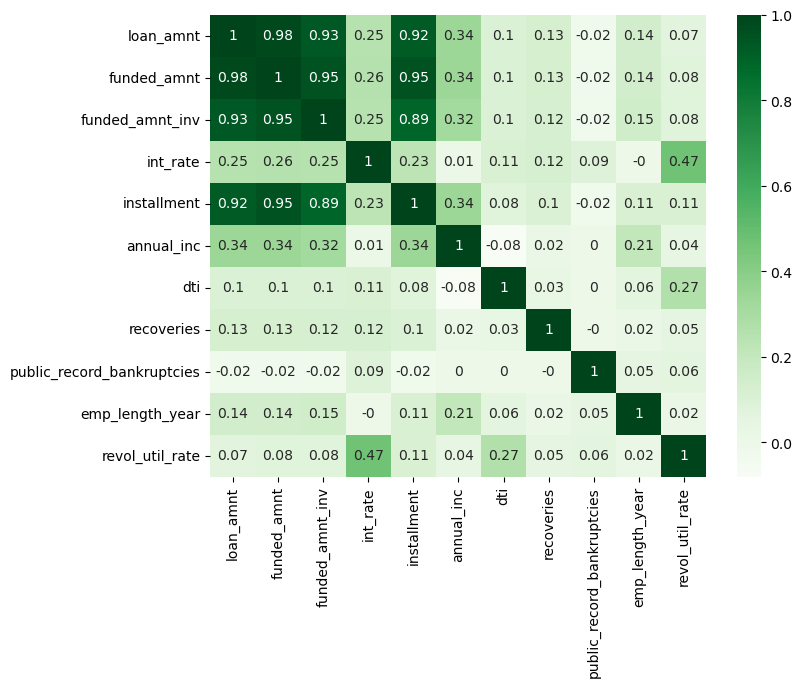

In [108]:
## get the correlation
loandata.drop('emp_title_absent',inplace=True,axis=1)
fig,ax = plt.subplots(figsize = (8,6))
correlation = loandata.corr().round(2)
sns.heatmap(correlation,annot=True,cmap="Greens")

### Observation on combined loan data based on above heatmap
#### loan_amount, funded amount, funded_amnt_inv, installment were closely positively correlated 
#### Annual income is negatively correlated to dti, higher the annual income lower is the dti , higher the dti lower is annual income
#### Funded amount is negatively correlated ti pub_rec_bankruptcies
#### Interest rate is negatively correlated to Annual Income

### Printing the corelation for charged off data set

<AxesSubplot:>

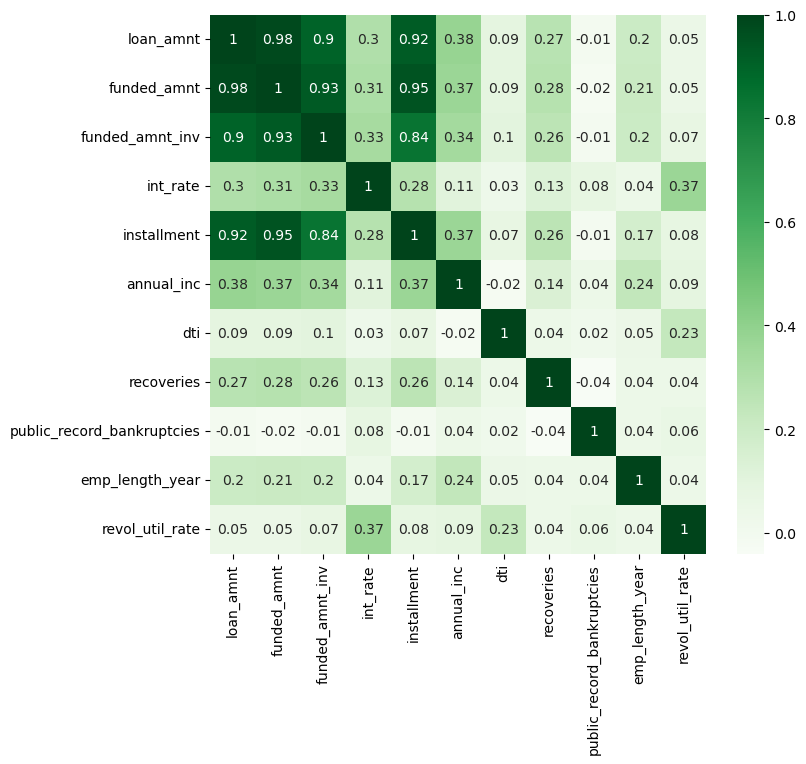

In [101]:
## get the correlation
fig,ax = plt.subplots(figsize = (8,7))
correlation = loandata_chargedoff.corr().round(2)
sns.heatmap(correlation,annot=True,cmap="Greens")

### Dropping the loan amount , funded amount_inv, installment as they are positively corelated to funded amount. Funded amount is taken for next set of analysis

### Converting categorical variable to numerical variable loan_status_Der where 10 means Fully paid, 5 means Charged off and arriving at the correlation matrix

<AxesSubplot:>

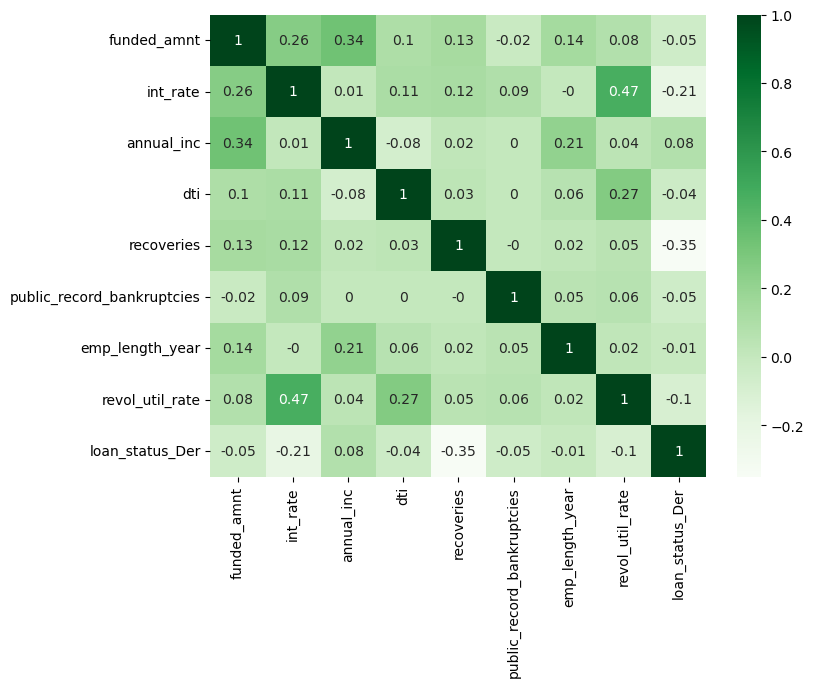

In [102]:
## charged of Co-relation matrix

loan_data_reduced = loandata
loan_data_reduced.drop('loan_amnt',inplace=True,axis=1)
loan_data_reduced.drop('funded_amnt_inv',inplace=True,axis=1)
loan_data_reduced.drop('installment',inplace=True,axis=1)

#parse revol_util_rate
def parseLoanStatus(x):
    x = str(x)
    if x == 'Fully Paid':
        x = '10'
    if x == 'Charged Off':
        x = '5'
    return float(x)
loan_data_reduced["loan_status_Der"]=loan_data_reduced["loan_status"].apply(lambda x:parseLoanStatus(x))


fig,ax = plt.subplots(figsize = (8,6))
corr = loan_data_reduced.corr().round(2)
sns.heatmap(corr,annot=True,cmap="Greens")



### Conclusion from Above Heatmap
#### loan status towards fully paid  is influenced  by features like annual income , more higher the annual income more closure towards fully paid
#### loan status towards charged off  is influenced by features like :
##### funded amount 
##### int_rate
##### dti
##### pub rec bankruptcies 
##### emp length year 
##### revol_util_rate


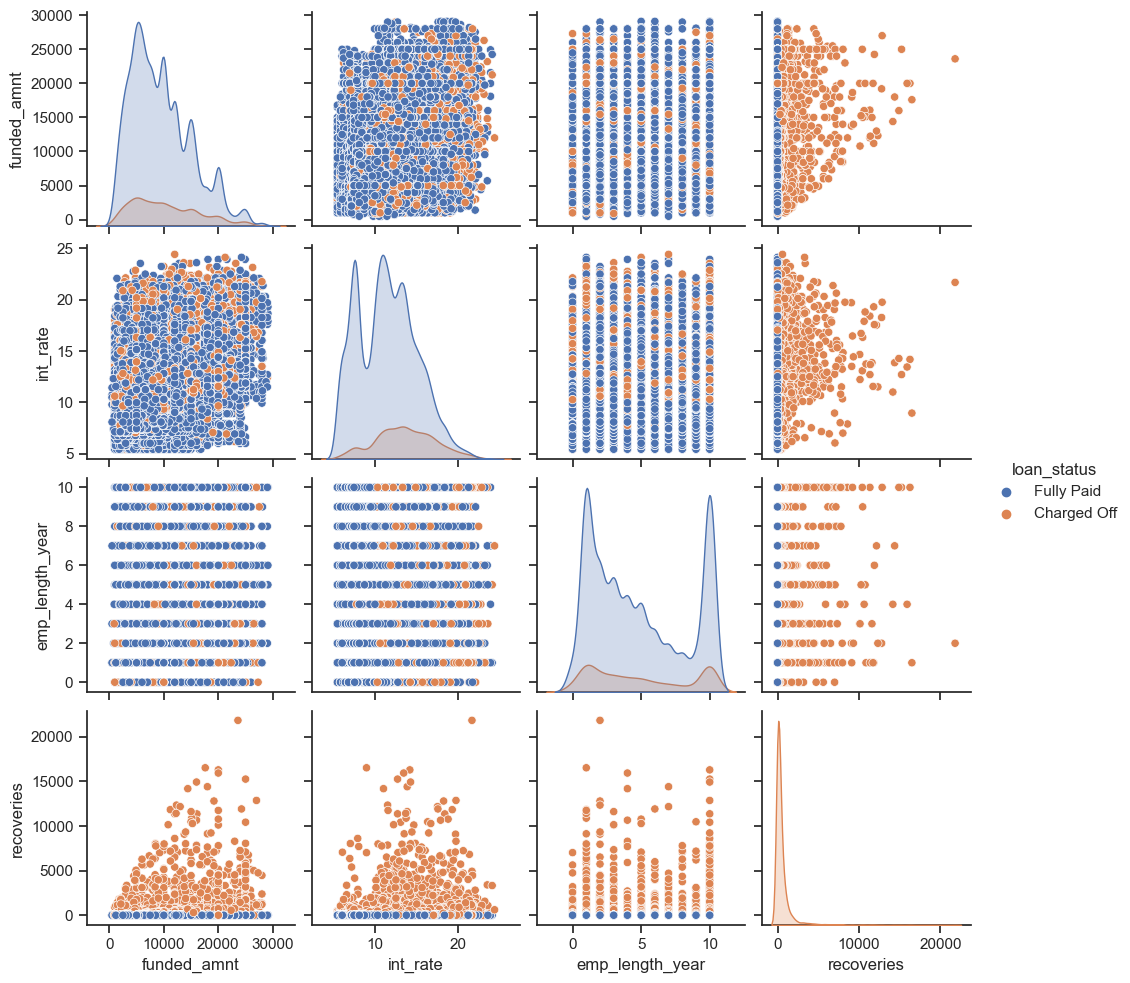

In [103]:
sns.set_theme(style="ticks")

loan_data_1 = loandata[['loan_status','funded_amnt','int_rate','emp_length_year',"recoveries"]]
sns.pairplot(loan_data_1, hue="loan_status")
plt.show()

## Conclusions from above pair plot
#### 1. Between int_rate vs funded amount no clean seperation observed between fully paid vs charged off 
#### 2. Between int_rate vs emp_length_year , across all emp length with lower int ratetill 10 , more is fully paid, Across all emp length once when the int rate > 10 both fully paid and charged off is there
#### 3. Between emp_length vs funded amount , no clean seperation is observed
#### 4. Between int_rate vs recovery , recoveries were zero for fully paid irrespective of int rate . recorveries were higher for charged off acorss all emp length (same applied for all recovery. Recoveries is closely associated to charged off . Not for fully paid)


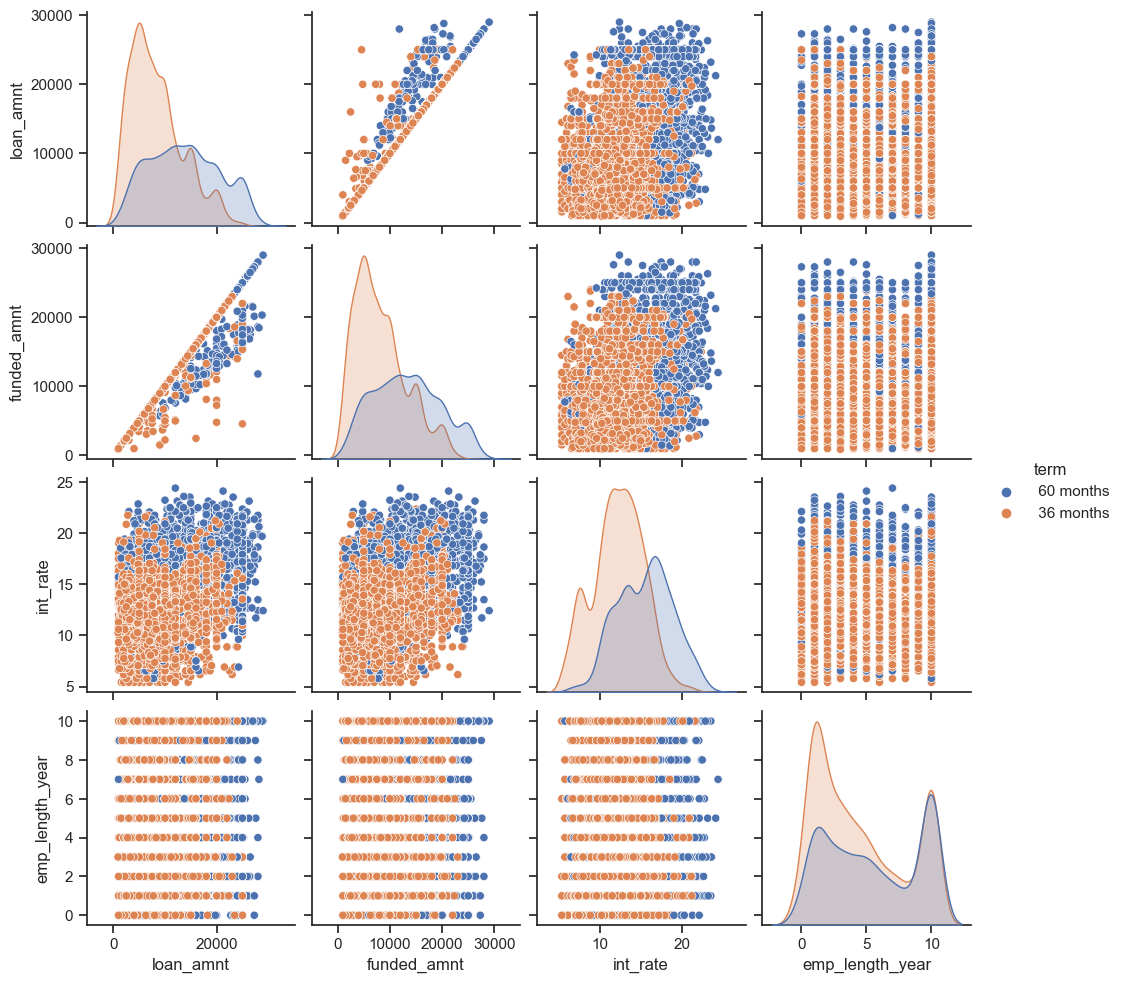

In [104]:
sns.set_theme(style="ticks")
loan_data_charged_off_1 = loandata_chargedoff[['loan_amnt','funded_amnt','int_rate','term','emp_length_year']]
sns.pairplot(loan_data_charged_off_1, hue="term")
plt.show()

## Conclusions from above pair plot
#### 1. Between loan amount vs funded amount , there exists positive correlation for both 36 months and 60 months
#### 2. Between int rate vs funded amount, lower interest rate till 18 with funded amount till 20000 were using term 36 months higher interest rate upto 25 and funded amount upto 30000 were using loan tearm 60 months
#### 3. Between funded amount vs emp_length , irrespective of emp_length , when funded ampunt is above 20000 loan term is 60 months when funded amount is less that 20000 term is 36 months
#### 4. Between emp_length vs loan amount, if loan amount > 20000, more 60 months is observed , less than 20000 36 months is applued
#### 5. Between emp_length vs funded amount if funded amount > 20000, more 60 months is observed , less than 20000 36 months is applued
#### 6. Between emp_length vs int_rate if , across all emp length for lower int rate till 18 , 36 months is used. for int rate above 18 60 months is observed